<a href="https://colab.research.google.com/github/CamiloEFB/Desafio_tecnico/blob/main/Desafio_tecnico_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este notebook se realizo en google colab

Primerodescargamos e Instalamos geo pandas para la visualizacion de latitud y longitud en un dataframe



In [5]:
!pip install git+git://github.com/geopandas/geopandas.git


  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-h2r9k30f
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-h2r9k30f


*se* importa geopandas para trabajar con ubicaciones, pandas para trabajar con data tabulada y numpy para operaciones matematicas trabajar con arrays

In [6]:
import geopandas as gpd

In [7]:
import pandas as pd
import numpy as np

abrimos los archivos necesarios que vamos a ocupar en un dataframe 

In [8]:
order_products = pd.read_csv('/content/order_products.csv')

In [9]:
order_products.head(15)

,order_id,product_id,quantity,buy_unit
0,47099653730fb1b76537fc10ad876255,c1244453d731c77416cb4766e3bd76cb,1.000,UN
1,689d8866915acf87e851c2591a23a82f,43cc2b100bec640fe563cd16f2db669f,1.000,KG
2,f26d16bf6f38c9e31d0be877f4013a9e,b8f880759d014134e272d881d49989a2,1.000,UN
3,161ccc896835ab41761b0e726becb6b1,dbc062b9bef805d27a6f4bea7edfe1f1,1.000,UN
4,4713deca10bb5db98fae150b52d61fc0,93a060f269bb569398921100f84c519a,2.000,UN
5,742c8318bd4b691ef21517372e12eb14,3692fe3fc98b55a7f41b70e24c5e70f1,1.000,UN
6,4bf1d742d2aaa747c8e42074306776c6,af43ffd0ff63a72e50e7340a382bcfb6,1.000,UN
7,a8b56b2aba8e0c2609b1e70fff2c1951,bdcc4590896a0d0b419d0388fd16a859,0.885,KG
8,63d745ef282dfeee0a89b5c8e4e79acb,07baf42dfefb6ed87312007dddab125e,1.000,UN
9,bea1786439523ef6973ec8395231e713,f387d33f0f968f1005e9ef45b66266c6,1.000,UN


Ocupare bastante info para saber de q esta compuesto cada dataframe si se encuenyran datos nulos que cantidad y tipo en que se encuentran los datos y forma 

In [10]:
order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198500 entries, 0 to 198499
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   order_id    198500 non-null  object 
 1   product_id  198500 non-null  object 
 2   quantity    198500 non-null  float64
 3   buy_unit    198500 non-null  object 
dtypes: float64(1), object(3)
memory usage: 6.1+ MB


In [11]:
order_products.shape

(198500, 4)

# exploratory analysis
de los datos que tengo 

In [12]:
order_products.quantity.value_counts().sort_values(ascending=False).head(50)

1.000     114283
2.000      36417
3.000      10682
4.000       9252
6.000       4910
5.000       2699
8.000       1658
10.000      1035
0.300        989
12.000       941
0.500        892
1.200        814
0.400        655
0.800        593
0.200        579
0.600        526
1.002        493
1.180        416
0.835        359
0.668        336
0.885        329
1.500        307
1.600        305
0.590        305
7.000        285
0.498        272
1.336        258
1.700        233
2.400        209
0.332        207
1.475        187
1.400        174
1.770        168
0.700        168
1.440        159
1.670        157
0.100        153
0.664        152
0.900        141
0.850        140
9.000        133
0.960        124
1.800        123
0.426        119
0.501        118
0.830        116
15.000       103
1.169         96
16.000        94
0.295         85
Name: quantity, dtype: int64

In [13]:
order_products.quantity.mean()

1.8241259230478724

voy a asumir que se puede comprar partes y no solo por unidad

In [14]:
order_products.nunique()

order_id       9978
product_id    15422
quantity        474
buy_unit          2
dtype: int64

en buy unit encontramos q hay solo dos variedades

In [15]:
order_products['buy_unit'].nunique()

2

In [16]:
order_products.describe()

,quantity
count,198500.000000
mean,1.824126
std,1.905529
min,0.055000
25%,1.000000
50%,1.000000
75%,2.000000
max,100.000000


se abren los demas archivos 

In [17]:
orders = pd.read_csv('/content/orders.csv')

In [18]:
orders.head(15)

,order_id,lat,lng,promised_time,on_demand,shopper_id,store_branch_id,total_minutes
0,e750294655c2c7c34d83cc3181c09de4,-33.501675,-70.579369,2019-10-18 20:48:00+00:00,True,e63bc83a1a952fa2b3cc9d558fb943cf,65ded5353c5ee48d0b7d48c591b8f430,67.684264
1,6581174846221cb6c467348e87f57641,-33.440584,-70.556283,2019-10-19 01:00:00+00:00,False,195f9e9d84a4ba9033c4b6a756334d8b,45fbc6d3e05ebd93369ce542e8f2322d,57.060632
2,3a226ea48debc0a7ae9950d5540f2f34,-32.987022,-71.544842,2019-10-19 14:54:00+00:00,True,a5b9ddc0d82e61582fca19ad43dbaacb,07563a3fe3bbe7e3ba84431ad9d055af,NaN
3,7d2ed03fe4966083e74b12694b1669d8,-33.328075,-70.512659,2019-10-18 21:47:00+00:00,True,d0b3f6bf7e249e5ebb8d3129341773a2,f1748d6b0fd9d439f71450117eba2725,52.067742
4,b4b2682d77118155fe4716300ccf7f39,-33.403239,-70.564020,2019-10-19 20:00:00+00:00,False,5c5199ce02f7b77caa9c2590a39ad27d,1f0e3dad99908345f7439f8ffabdffc4,140.724822
5,9bf29b56619fcaf60b52690a848e10bb,-33.330724,-70.547074,2019-10-18 23:47:00+00:00,True,61e4ad15c3ff928840ebd34407055b33,33e75ff09dd601bbe69f351039152189,NaN
6,2c036d7b5db4b3cb8abf44d9fa46b138,-33.447730,-70.573825,2019-10-19 14:50:00+00:00,True,5c15f25cf0be9893ad4780fa050d8fa3,5751ec3e9a4feab575962e78e006250d,45.535737
7,d35c25397869d7effb3f3c140d248925,-33.450098,-70.603949,2019-10-19 02:00:00+00:00,False,3c4885d7dd4b68021456be3c24a034dc,e4da3b7fbbce2345d7772b0674a318d5,121.394073
8,93d769afdc93ad42811c3a3099b4d11e,-33.363772,-70.548334,2019-10-18 21:18:00+00:00,True,278e1e3dbd7de0fc653bf4500700c6ef,33e75ff09dd601bbe69f351039152189,72.446429
9,299d948a5fd2cf2a921894b9bd24b94e,-33.349922,-70.522841,2019-10-18 21:54:00+00:00,True,1456fc09701783b29f69e8f68c029879,1679091c5a880faf6fb5e6087eb1b2dc,NaN


In [19]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   order_id         10000 non-null  object 
 1   lat              10000 non-null  float64
 2   lng              10000 non-null  float64
 3   promised_time    10000 non-null  object 
 4   on_demand        10000 non-null  bool   
 5   shopper_id       10000 non-null  object 
 6   store_branch_id  10000 non-null  object 
 7   total_minutes    8000 non-null   float64
dtypes: bool(1), float64(3), object(4)
memory usage: 556.8+ KB


In [20]:
orders.nunique()

order_id           10000
lat                 8241
lng                 8193
promised_time        888
on_demand              2
shopper_id          2864
store_branch_id      476
total_minutes       8000
dtype: int64

In [21]:
orders.shape

(10000, 8)

In [22]:
orders.total_minutes.nunique()

8000

eliminar datos q ocuparemos como Y (label) que se encuentren incompletos

In [23]:
orders.dropna(subset=['total_minutes'], inplace=True)

In [24]:
orders.nunique()

order_id           8000
lat                6777
lng                6740
promised_time       852
on_demand             2
shopper_id         2735
store_branch_id     434
total_minutes      8000
dtype: int64

In [25]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   order_id         8000 non-null   object 
 1   lat              8000 non-null   float64
 2   lng              8000 non-null   float64
 3   promised_time    8000 non-null   object 
 4   on_demand        8000 non-null   bool   
 5   shopper_id       8000 non-null   object 
 6   store_branch_id  8000 non-null   object 
 7   total_minutes    8000 non-null   float64
dtypes: bool(1), float64(3), object(4)
memory usage: 507.8+ KB


In [26]:
orders.shape

(8000, 8)

In [27]:
shoppers= pd.read_csv('/content/shoppers.csv')

In [28]:
shoppers.head(15)

,shopper_id,seniority,found_rate,picking_speed,accepted_rate,rating
0,1fc20b0bdf697ac13dd6a15cbd2fe60a,41dc7c9e385c4d2b6c1f7836973951bf,0.8606,1.94,1.00,4.87
1,e1c679ac73a69c01981fdd3c5ab8beda,6c90661e6d2c7579f5ce337c3391dbb9,0.8446,1.23,0.92,4.92
2,09d369c66ca86ebeffacb133410c5ee1,6c90661e6d2c7579f5ce337c3391dbb9,0.8559,1.56,1.00,4.88
3,db39866e62b95bb04ebb1e470f2d1347,50e13ee63f086c2fe84229348bc91b5b,NaN,2.41,NaN,NaN
4,8efbc238660053b19f00ca431144fdae,6c90661e6d2c7579f5ce337c3391dbb9,0.8770,1.31,0.92,4.88
5,48851e4b4e584d424d84c5caf2e9a30e,6c90661e6d2c7579f5ce337c3391dbb9,0.9048,1.10,0.92,4.72
6,561cf6ce565ddf83a028325444a3db01,50e13ee63f086c2fe84229348bc91b5b,0.7949,4.17,0.56,4.83
7,0cfaf7c3c140033cc4d70f3d98c39d39,50e13ee63f086c2fe84229348bc91b5b,0.9070,1.84,0.84,5.00
8,026229d08139f0417381715cf4818bfb,6c90661e6d2c7579f5ce337c3391dbb9,0.8523,1.17,0.96,4.96
9,fe06e5d24d2e58abd8d2f731a65c9146,41dc7c9e385c4d2b6c1f7836973951bf,0.8521,1.71,1.00,4.96


In [29]:
shoppers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   shopper_id     2864 non-null   object 
 1   seniority      2864 non-null   object 
 2   found_rate     2763 non-null   float64
 3   picking_speed  2864 non-null   float64
 4   accepted_rate  2837 non-null   float64
 5   rating         2780 non-null   float64
dtypes: float64(4), object(2)
memory usage: 134.4+ KB


que datos se encuentran nan y en que columnas se encuentran, cuentos en total

In [30]:
shoppers[['rating','found_rate', 'accepted_rate']].isnull().sum()

rating            84
found_rate       101
accepted_rate     27
dtype: int64

In [31]:
shoppers.isnull().sum().sum()

212

cuantos nan se encuentran en las mismas rows se encuentra que 27 coinciden 3 nan esto sera importante mas adelante

In [32]:
shoppers[['rating','found_rate', 'accepted_rate']].isnull().value_counts()

rating  found_rate  accepted_rate
False   False       False            2754
True    True        False              48
                    True               27
False   True        False              26
True    False       False               9
dtype: int64

In [33]:
shoppers.nunique()

shopper_id       2864
seniority           4
found_rate       1080
picking_speed     300
accepted_rate      92
rating             57
dtype: int64

In [34]:
shoppers.describe()

,found_rate,picking_speed,accepted_rate,rating
count,2763.000000,2864.000000,2837.000000,2780.000000
mean,0.861082,1.762392,0.908276,4.848428
std,0.031038,0.665962,0.107911,0.133011
min,0.737300,0.650000,0.240000,3.880000
25%,0.842900,1.290000,0.880000,4.800000
50%,0.863900,1.580000,0.944444,4.880000
75%,0.881950,2.120000,1.000000,4.960000
max,0.971000,7.040000,1.000000,5.000000


separar los distintos grupos de seniority que se encuentran en shoppers 

In [35]:
shoppers.seniority.value_counts()

6c90661e6d2c7579f5ce337c3391dbb9    1643
50e13ee63f086c2fe84229348bc91b5b     719
41dc7c9e385c4d2b6c1f7836973951bf     440
bb29b8d0d196b5db5a5350e5e3ae2b1f      62
Name: seniority, dtype: int64

In [36]:
shoppers.shopper_id.value_counts()

a50a78c54c411935428094943e6692b1    1
874a11f4a5964ae7f80effe9bd547af5    1
ee0610a66a2f46e3f83a621334c2c0ab    1
008583500763395c6e4fad7bbdfde9dd    1
72ff1bf7969dff2827cfc1901ded4eb2    1
                                   ..
9cabae52c8a68d66ec5052208dd7492d    1
e229b969d41c907e498285178a6a02bb    1
31b0902d0fb997218fabc2991a3d3d8b    1
cc5dfe943586208aa5e4296813f92e7a    1
67aa80c7e7128928f02a48bf69ee7821    1
Name: shopper_id, Length: 2864, dtype: int64

In [37]:
shoppers.shopper_id.nunique()

2864

los rating que les dieron partiendo de los mas altos se encuentra que le dan 5 bastante y la media es de 4.8 aproximado

In [38]:
shoppers.sort_values('rating', ascending=False).head(50)

,shopper_id,seniority,found_rate,picking_speed,accepted_rate,rating
1429,024c4d6e7b135071db76439b1225d8db,50e13ee63f086c2fe84229348bc91b5b,0.8547,1.63,0.600000,5.0
1677,36de8e928be810282f3f691e621ebed8,41dc7c9e385c4d2b6c1f7836973951bf,NaN,2.19,1.000000,5.0
1683,a0554d789b2351da4b13648cc9e5fca3,6c90661e6d2c7579f5ce337c3391dbb9,0.8260,1.71,1.000000,5.0
1709,b913cf952c3fb98cad120e784aef6849,41dc7c9e385c4d2b6c1f7836973951bf,0.8360,1.80,0.920000,5.0
1712,9cda04cae52bd1e49e1149c9b2cf4b0e,41dc7c9e385c4d2b6c1f7836973951bf,0.9318,2.20,1.000000,5.0
1715,e51c15dceb41ba1de6cd247dd625568e,6c90661e6d2c7579f5ce337c3391dbb9,0.8671,1.46,0.880000,5.0
1716,6a991fc713604899c1ab671c28d2b80c,41dc7c9e385c4d2b6c1f7836973951bf,0.8324,1.58,0.960000,5.0
1737,3856a6eed805a0cefded1c2ed07d84ea,50e13ee63f086c2fe84229348bc91b5b,0.8863,2.38,0.840000,5.0
1747,9222e3e98a7ccf4e044d8d3695e596fe,50e13ee63f086c2fe84229348bc91b5b,0.8313,1.96,0.600000,5.0
1750,de02af782798e070ebd8c241609c4558,6c90661e6d2c7579f5ce337c3391dbb9,0.8476,1.95,0.920000,5.0


In [39]:
shoopers_rating=shoppers.rating.value_counts()

grupos de los rating mas comunes que tienen los shooper de mas comun a menos comun

In [40]:
shoopers_rating.sort_values(ascending=False)

4.92    425
4.96    368
5.00    351
4.88    309
4.84    296
4.80    212
4.76    182
4.72    121
4.68     98
4.64     56
4.60     41
4.56     33
4.52     29
4.83     20
4.94     17
4.95     15
4.44     13
4.93     12
4.48     12
4.89     11
4.87     10
4.75     10
4.71     10
4.91     10
4.79      9
4.78      9
4.85      7
4.90      7
4.81      7
4.86      7
4.82      7
4.36      7
4.73      6
4.67      6
4.40      5
4.70      4
4.33      4
4.69      3
4.77      3
4.50      3
4.30      3
4.28      2
4.57      2
4.32      2
4.00      2
4.43      2
4.63      2
4.38      1
4.17      1
4.22      1
4.54      1
3.88      1
4.41      1
4.29      1
4.62      1
4.65      1
4.20      1
Name: rating, dtype: int64

graficar los grupos de seniority y como esta distribuido los rating en cada grupo

In [41]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [42]:
fig = px.strip(shoppers, 
              x='seniority', 
              y='rating',  
              title='seniority vs. rating')
fig.update_traces(marker_size=5)
fig.show()

In [43]:
shoppers.shape

(2864, 6)

# Eliminamos todos los q tenian 3 datos o mas nan

In [44]:
shopper_1=shoppers.dropna(how='any',axis=0,thresh=4)

In [45]:
shopper_1[['rating','found_rate', 'accepted_rate']].isnull().sum()

rating           57
found_rate       74
accepted_rate     0
dtype: int64

In [46]:
shopper_1

,shopper_id,seniority,found_rate,picking_speed,accepted_rate,rating
0,1fc20b0bdf697ac13dd6a15cbd2fe60a,41dc7c9e385c4d2b6c1f7836973951bf,0.8606,1.94,1.00,4.87
1,e1c679ac73a69c01981fdd3c5ab8beda,6c90661e6d2c7579f5ce337c3391dbb9,0.8446,1.23,0.92,4.92
2,09d369c66ca86ebeffacb133410c5ee1,6c90661e6d2c7579f5ce337c3391dbb9,0.8559,1.56,1.00,4.88
4,8efbc238660053b19f00ca431144fdae,6c90661e6d2c7579f5ce337c3391dbb9,0.8770,1.31,0.92,4.88
5,48851e4b4e584d424d84c5caf2e9a30e,6c90661e6d2c7579f5ce337c3391dbb9,0.9048,1.10,0.92,4.72
...,...,...,...,...,...,...
2859,da24da1311f7913f6d2d29d8238b439c,6c90661e6d2c7579f5ce337c3391dbb9,0.8951,1.53,0.88,4.80
2860,cf95eda5ffc1d4b9586de2ca08ab40f8,50e13ee63f086c2fe84229348bc91b5b,0.8695,3.00,0.56,5.00
2861,e8482e3ad8bc820ec756566a472b84b1,6c90661e6d2c7579f5ce337c3391dbb9,0.9152,1.47,0.88,4.96
2862,a55a3765a02530a97eb9af7aee327486,6c90661e6d2c7579f5ce337c3391dbb9,0.8695,1.20,0.96,4.80


In [47]:
shopper_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2837 entries, 0 to 2863
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   shopper_id     2837 non-null   object 
 1   seniority      2837 non-null   object 
 2   found_rate     2763 non-null   float64
 3   picking_speed  2837 non-null   float64
 4   accepted_rate  2837 non-null   float64
 5   rating         2780 non-null   float64
dtypes: float64(4), object(2)
memory usage: 155.1+ KB


In [48]:
shopper_1[['rating','found_rate']].isnull().sum()

rating        57
found_rate    74
dtype: int64

rellenamos los valores de found_rate con los valores promedios mean de ellos, lo mismo para rating con el promedio rellenamos los datos nan y luego lo comprobamos 

In [49]:
shopper_1['found_rate'].fillna((shopper_1['found_rate'].mean()), inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [50]:
shopper_1['rating'].fillna((shopper_1['rating'].mean()), inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [51]:
shopper_1[['rating','found_rate']].isnull().sum()

rating        0
found_rate    0
dtype: int64

In [52]:
shopper_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2837 entries, 0 to 2863
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   shopper_id     2837 non-null   object 
 1   seniority      2837 non-null   object 
 2   found_rate     2837 non-null   float64
 3   picking_speed  2837 non-null   float64
 4   accepted_rate  2837 non-null   float64
 5   rating         2837 non-null   float64
dtypes: float64(4), object(2)
memory usage: 155.1+ KB


In [53]:
shopper_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2837 entries, 0 to 2863
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   shopper_id     2837 non-null   object 
 1   seniority      2837 non-null   object 
 2   found_rate     2837 non-null   float64
 3   picking_speed  2837 non-null   float64
 4   accepted_rate  2837 non-null   float64
 5   rating         2837 non-null   float64
dtypes: float64(4), object(2)
memory usage: 155.1+ KB


In [54]:
storebranch = pd.read_csv('/content/storebranch.csv')

In [55]:
storebranch.head(15)

,store_branch_id,store_id,lat,lng
0,aff1621254f7c1be92f64550478c56e6,92cc227532d17e56e07902b254dfad10,-33.422497,-70.609231
1,56352739f59643540a3a6e16985f62c7,0336dcbab05b9d5ad24f4333c7658a0e,-33.385484,-70.555579
2,7d04bbbe5494ae9d2f5a76aa1c00fa2f,9bf31c7ff062936a96d3c8bd1f8f2ff3,-33.416579,-70.565224
3,2b24d495052a8ce66358eb576b8912c8,c4ca4238a0b923820dcc509a6f75849b,-33.512578,-70.655952
4,5487315b1286f907165907aa8fc96619,d82c8d1619ad8176d665453cfb2e55f0,-33.347645,-70.542229
5,24146db4eb48c718b84cae0a0799dcfc,5fd0b37cd7dbbb00f97ba6ce92bf5add,-33.404418,-70.597078
6,6e0721b2c6977135b916ef286bcb49ec,32bb90e8976aab5298d5da10fe66f21d,-33.419070,-70.551128
7,a981f2b708044d6fb4a71a1463242520,c4ca4238a0b923820dcc509a6f75849b,-33.516349,-70.708798
8,c5ab0bc60ac7929182aadd08703f1ec6,c0c7c76d30bd3dcaefc96f40275bdc0a,-33.455672,-70.585630
9,8bb88f80d334b1869781beb89f7b73be,1700002963a49da13542e0726b7bb758,-33.398621,-70.598018


In [56]:
storebranch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   store_branch_id  476 non-null    object 
 1   store_id         476 non-null    object 
 2   lat              476 non-null    float64
 3   lng              476 non-null    float64
dtypes: float64(2), object(2)
memory usage: 15.0+ KB


In [57]:
storebranch.nunique()

store_branch_id    476
store_id           221
lat                445
lng                444
dtype: int64

combinamos los dataframes en lo que se en ambos como por ejemplo order_products con orders se juntan en order_id

In [58]:
merge_df_1 =order_products.merge(orders, on= 'order_id')

In [59]:
merge_df_1.head(50)

,order_id,product_id,quantity,buy_unit,lat,lng,promised_time,on_demand,shopper_id,store_branch_id,total_minutes
0,689d8866915acf87e851c2591a23a82f,43cc2b100bec640fe563cd16f2db669f,1.000,KG,-33.279422,-70.623750,2019-10-19 15:59:00+00:00,True,a4118092dbfe7836201ef6a8f4774f3f,7ef605fc8dba5425d6965fbd4c8fbe1f,91.855363
1,689d8866915acf87e851c2591a23a82f,58aaa613441ab56d0ae7e405fbf72f85,1.000,UN,-33.279422,-70.623750,2019-10-19 15:59:00+00:00,True,a4118092dbfe7836201ef6a8f4774f3f,7ef605fc8dba5425d6965fbd4c8fbe1f,91.855363
2,689d8866915acf87e851c2591a23a82f,cd0dce8fca267bf1fb86cf43e18d5598,1.000,UN,-33.279422,-70.623750,2019-10-19 15:59:00+00:00,True,a4118092dbfe7836201ef6a8f4774f3f,7ef605fc8dba5425d6965fbd4c8fbe1f,91.855363
3,689d8866915acf87e851c2591a23a82f,1fba6e9254d8a0ae8706eb2560545949,1.000,UN,-33.279422,-70.623750,2019-10-19 15:59:00+00:00,True,a4118092dbfe7836201ef6a8f4774f3f,7ef605fc8dba5425d6965fbd4c8fbe1f,91.855363
4,689d8866915acf87e851c2591a23a82f,9c9fb9c493c51d7d9e0beff68b9c7171,2.000,UN,-33.279422,-70.623750,2019-10-19 15:59:00+00:00,True,a4118092dbfe7836201ef6a8f4774f3f,7ef605fc8dba5425d6965fbd4c8fbe1f,91.855363
5,689d8866915acf87e851c2591a23a82f,60b55796cf5366c7645ace6529cca145,1.000,UN,-33.279422,-70.623750,2019-10-19 15:59:00+00:00,True,a4118092dbfe7836201ef6a8f4774f3f,7ef605fc8dba5425d6965fbd4c8fbe1f,91.855363
6,689d8866915acf87e851c2591a23a82f,3cb863f84f62e4c9b119c3cc87a4c14d,1.000,UN,-33.279422,-70.623750,2019-10-19 15:59:00+00:00,True,a4118092dbfe7836201ef6a8f4774f3f,7ef605fc8dba5425d6965fbd4c8fbe1f,91.855363
7,689d8866915acf87e851c2591a23a82f,f90b55ea82b8af664f1d7eebb93f25e0,0.668,KG,-33.279422,-70.623750,2019-10-19 15:59:00+00:00,True,a4118092dbfe7836201ef6a8f4774f3f,7ef605fc8dba5425d6965fbd4c8fbe1f,91.855363
8,689d8866915acf87e851c2591a23a82f,092c231a4e0d240dd08c205e0a373600,1.000,UN,-33.279422,-70.623750,2019-10-19 15:59:00+00:00,True,a4118092dbfe7836201ef6a8f4774f3f,7ef605fc8dba5425d6965fbd4c8fbe1f,91.855363
9,689d8866915acf87e851c2591a23a82f,dbd22ba3bd0df8f385bdac3e9f8be207,1.000,UN,-33.279422,-70.623750,2019-10-19 15:59:00+00:00,True,a4118092dbfe7836201ef6a8f4774f3f,7ef605fc8dba5425d6965fbd4c8fbe1f,91.855363


In [60]:
merge_df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158308 entries, 0 to 158307
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   order_id         158308 non-null  object 
 1   product_id       158308 non-null  object 
 2   quantity         158308 non-null  float64
 3   buy_unit         158308 non-null  object 
 4   lat              158308 non-null  float64
 5   lng              158308 non-null  float64
 6   promised_time    158308 non-null  object 
 7   on_demand        158308 non-null  bool   
 8   shopper_id       158308 non-null  object 
 9   store_branch_id  158308 non-null  object 
 10  total_minutes    158308 non-null  float64
dtypes: bool(1), float64(4), object(6)
memory usage: 13.4+ MB


In [61]:
merge_df_1.nunique()

order_id            7983
product_id         14138
quantity             437
buy_unit               2
lat                 6773
lng                 6736
promised_time        851
on_demand              2
shopper_id          2734
store_branch_id      431
total_minutes       7983
dtype: int64

In [62]:
merge_df_1.shape

(158308, 11)

In [63]:
merge_df_1.order_id.value_counts()

4b5a71f89489aef4b68a18413da48586    145
57c8d0a346f10c0c4fc90739910bea4f    136
866cdbeb18d0d70414790e6b3962006a    129
fbf351bb22fd781edd54f278bae1668e    120
a77e9b1ac7d19b52b1bbfb4bc08ef158    118
                                   ... 
159ad6eef91dac877a00fc435d328401      1
6d067a9cd21b1f426df8ccc04726b957      1
62b0adc7f803417fbcad919bd01a22d0      1
d8bf02b40f6fe8f9518fa66c55a3b2fb      1
97f3bc0e9615707181d430255c5a41b3      1
Name: order_id, Length: 7983, dtype: int64

In [64]:
merge_df_2 = merge_df_1.merge(shoppers, on='shopper_id')

In [65]:
merge_df_2.head(50)

,order_id,product_id,quantity,buy_unit,lat,lng,promised_time,on_demand,shopper_id,store_branch_id,total_minutes,seniority,found_rate,picking_speed,accepted_rate,rating
0,689d8866915acf87e851c2591a23a82f,43cc2b100bec640fe563cd16f2db669f,1.000,KG,-33.279422,-70.623750,2019-10-19 15:59:00+00:00,True,a4118092dbfe7836201ef6a8f4774f3f,7ef605fc8dba5425d6965fbd4c8fbe1f,91.855363,50e13ee63f086c2fe84229348bc91b5b,0.8402,1.88,0.76,4.68
1,689d8866915acf87e851c2591a23a82f,58aaa613441ab56d0ae7e405fbf72f85,1.000,UN,-33.279422,-70.623750,2019-10-19 15:59:00+00:00,True,a4118092dbfe7836201ef6a8f4774f3f,7ef605fc8dba5425d6965fbd4c8fbe1f,91.855363,50e13ee63f086c2fe84229348bc91b5b,0.8402,1.88,0.76,4.68
2,689d8866915acf87e851c2591a23a82f,cd0dce8fca267bf1fb86cf43e18d5598,1.000,UN,-33.279422,-70.623750,2019-10-19 15:59:00+00:00,True,a4118092dbfe7836201ef6a8f4774f3f,7ef605fc8dba5425d6965fbd4c8fbe1f,91.855363,50e13ee63f086c2fe84229348bc91b5b,0.8402,1.88,0.76,4.68
3,689d8866915acf87e851c2591a23a82f,1fba6e9254d8a0ae8706eb2560545949,1.000,UN,-33.279422,-70.623750,2019-10-19 15:59:00+00:00,True,a4118092dbfe7836201ef6a8f4774f3f,7ef605fc8dba5425d6965fbd4c8fbe1f,91.855363,50e13ee63f086c2fe84229348bc91b5b,0.8402,1.88,0.76,4.68
4,689d8866915acf87e851c2591a23a82f,9c9fb9c493c51d7d9e0beff68b9c7171,2.000,UN,-33.279422,-70.623750,2019-10-19 15:59:00+00:00,True,a4118092dbfe7836201ef6a8f4774f3f,7ef605fc8dba5425d6965fbd4c8fbe1f,91.855363,50e13ee63f086c2fe84229348bc91b5b,0.8402,1.88,0.76,4.68
5,689d8866915acf87e851c2591a23a82f,60b55796cf5366c7645ace6529cca145,1.000,UN,-33.279422,-70.623750,2019-10-19 15:59:00+00:00,True,a4118092dbfe7836201ef6a8f4774f3f,7ef605fc8dba5425d6965fbd4c8fbe1f,91.855363,50e13ee63f086c2fe84229348bc91b5b,0.8402,1.88,0.76,4.68
6,689d8866915acf87e851c2591a23a82f,3cb863f84f62e4c9b119c3cc87a4c14d,1.000,UN,-33.279422,-70.623750,2019-10-19 15:59:00+00:00,True,a4118092dbfe7836201ef6a8f4774f3f,7ef605fc8dba5425d6965fbd4c8fbe1f,91.855363,50e13ee63f086c2fe84229348bc91b5b,0.8402,1.88,0.76,4.68
7,689d8866915acf87e851c2591a23a82f,f90b55ea82b8af664f1d7eebb93f25e0,0.668,KG,-33.279422,-70.623750,2019-10-19 15:59:00+00:00,True,a4118092dbfe7836201ef6a8f4774f3f,7ef605fc8dba5425d6965fbd4c8fbe1f,91.855363,50e13ee63f086c2fe84229348bc91b5b,0.8402,1.88,0.76,4.68
8,689d8866915acf87e851c2591a23a82f,092c231a4e0d240dd08c205e0a373600,1.000,UN,-33.279422,-70.623750,2019-10-19 15:59:00+00:00,True,a4118092dbfe7836201ef6a8f4774f3f,7ef605fc8dba5425d6965fbd4c8fbe1f,91.855363,50e13ee63f086c2fe84229348bc91b5b,0.8402,1.88,0.76,4.68
9,689d8866915acf87e851c2591a23a82f,dbd22ba3bd0df8f385bdac3e9f8be207,1.000,UN,-33.279422,-70.623750,2019-10-19 15:59:00+00:00,True,a4118092dbfe7836201ef6a8f4774f3f,7ef605fc8dba5425d6965fbd4c8fbe1f,91.855363,50e13ee63f086c2fe84229348bc91b5b,0.8402,1.88,0.76,4.68


In [66]:
merge_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158308 entries, 0 to 158307
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   order_id         158308 non-null  object 
 1   product_id       158308 non-null  object 
 2   quantity         158308 non-null  float64
 3   buy_unit         158308 non-null  object 
 4   lat              158308 non-null  float64
 5   lng              158308 non-null  float64
 6   promised_time    158308 non-null  object 
 7   on_demand        158308 non-null  bool   
 8   shopper_id       158308 non-null  object 
 9   store_branch_id  158308 non-null  object 
 10  total_minutes    158308 non-null  float64
 11  seniority        158308 non-null  object 
 12  found_rate       156442 non-null  float64
 13  picking_speed    158308 non-null  float64
 14  accepted_rate    157764 non-null  float64
 15  rating           156620 non-null  float64
dtypes: bool(1), float64(8), object(7)
memo

##recordar eliminar los datos q tienen tres 3 nan

In [67]:
merge_df_2.shape

(158308, 16)

In [68]:
merge_df_3 = merge_df_2.merge(storebranch, on = 'store_branch_id')

In [69]:
merge_df_3.head(15)

,order_id,product_id,quantity,buy_unit,lat_x,lng_x,promised_time,on_demand,shopper_id,store_branch_id,total_minutes,seniority,found_rate,picking_speed,accepted_rate,rating,store_id,lat_y,lng_y
0,689d8866915acf87e851c2591a23a82f,43cc2b100bec640fe563cd16f2db669f,1.000,KG,-33.279422,-70.62375,2019-10-19 15:59:00+00:00,True,a4118092dbfe7836201ef6a8f4774f3f,7ef605fc8dba5425d6965fbd4c8fbe1f,91.855363,50e13ee63f086c2fe84229348bc91b5b,0.8402,1.88,0.76,4.68,c4ca4238a0b923820dcc509a6f75849b,-33.276853,-70.628167
1,689d8866915acf87e851c2591a23a82f,58aaa613441ab56d0ae7e405fbf72f85,1.000,UN,-33.279422,-70.62375,2019-10-19 15:59:00+00:00,True,a4118092dbfe7836201ef6a8f4774f3f,7ef605fc8dba5425d6965fbd4c8fbe1f,91.855363,50e13ee63f086c2fe84229348bc91b5b,0.8402,1.88,0.76,4.68,c4ca4238a0b923820dcc509a6f75849b,-33.276853,-70.628167
2,689d8866915acf87e851c2591a23a82f,cd0dce8fca267bf1fb86cf43e18d5598,1.000,UN,-33.279422,-70.62375,2019-10-19 15:59:00+00:00,True,a4118092dbfe7836201ef6a8f4774f3f,7ef605fc8dba5425d6965fbd4c8fbe1f,91.855363,50e13ee63f086c2fe84229348bc91b5b,0.8402,1.88,0.76,4.68,c4ca4238a0b923820dcc509a6f75849b,-33.276853,-70.628167
3,689d8866915acf87e851c2591a23a82f,1fba6e9254d8a0ae8706eb2560545949,1.000,UN,-33.279422,-70.62375,2019-10-19 15:59:00+00:00,True,a4118092dbfe7836201ef6a8f4774f3f,7ef605fc8dba5425d6965fbd4c8fbe1f,91.855363,50e13ee63f086c2fe84229348bc91b5b,0.8402,1.88,0.76,4.68,c4ca4238a0b923820dcc509a6f75849b,-33.276853,-70.628167
4,689d8866915acf87e851c2591a23a82f,9c9fb9c493c51d7d9e0beff68b9c7171,2.000,UN,-33.279422,-70.62375,2019-10-19 15:59:00+00:00,True,a4118092dbfe7836201ef6a8f4774f3f,7ef605fc8dba5425d6965fbd4c8fbe1f,91.855363,50e13ee63f086c2fe84229348bc91b5b,0.8402,1.88,0.76,4.68,c4ca4238a0b923820dcc509a6f75849b,-33.276853,-70.628167
5,689d8866915acf87e851c2591a23a82f,60b55796cf5366c7645ace6529cca145,1.000,UN,-33.279422,-70.62375,2019-10-19 15:59:00+00:00,True,a4118092dbfe7836201ef6a8f4774f3f,7ef605fc8dba5425d6965fbd4c8fbe1f,91.855363,50e13ee63f086c2fe84229348bc91b5b,0.8402,1.88,0.76,4.68,c4ca4238a0b923820dcc509a6f75849b,-33.276853,-70.628167
6,689d8866915acf87e851c2591a23a82f,3cb863f84f62e4c9b119c3cc87a4c14d,1.000,UN,-33.279422,-70.62375,2019-10-19 15:59:00+00:00,True,a4118092dbfe7836201ef6a8f4774f3f,7ef605fc8dba5425d6965fbd4c8fbe1f,91.855363,50e13ee63f086c2fe84229348bc91b5b,0.8402,1.88,0.76,4.68,c4ca4238a0b923820dcc509a6f75849b,-33.276853,-70.628167
7,689d8866915acf87e851c2591a23a82f,f90b55ea82b8af664f1d7eebb93f25e0,0.668,KG,-33.279422,-70.62375,2019-10-19 15:59:00+00:00,True,a4118092dbfe7836201ef6a8f4774f3f,7ef605fc8dba5425d6965fbd4c8fbe1f,91.855363,50e13ee63f086c2fe84229348bc91b5b,0.8402,1.88,0.76,4.68,c4ca4238a0b923820dcc509a6f75849b,-33.276853,-70.628167
8,689d8866915acf87e851c2591a23a82f,092c231a4e0d240dd08c205e0a373600,1.000,UN,-33.279422,-70.62375,2019-10-19 15:59:00+00:00,True,a4118092dbfe7836201ef6a8f4774f3f,7ef605fc8dba5425d6965fbd4c8fbe1f,91.855363,50e13ee63f086c2fe84229348bc91b5b,0.8402,1.88,0.76,4.68,c4ca4238a0b923820dcc509a6f75849b,-33.276853,-70.628167
9,689d8866915acf87e851c2591a23a82f,dbd22ba3bd0df8f385bdac3e9f8be207,1.000,UN,-33.279422,-70.62375,2019-10-19 15:59:00+00:00,True,a4118092dbfe7836201ef6a8f4774f3f,7ef605fc8dba5425d6965fbd4c8fbe1f,91.855363,50e13ee63f086c2fe84229348bc91b5b,0.8402,1.88,0.76,4.68,c4ca4238a0b923820dcc509a6f75849b,-33.276853,-70.628167


In [70]:
merge_df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158308 entries, 0 to 158307
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   order_id         158308 non-null  object 
 1   product_id       158308 non-null  object 
 2   quantity         158308 non-null  float64
 3   buy_unit         158308 non-null  object 
 4   lat_x            158308 non-null  float64
 5   lng_x            158308 non-null  float64
 6   promised_time    158308 non-null  object 
 7   on_demand        158308 non-null  bool   
 8   shopper_id       158308 non-null  object 
 9   store_branch_id  158308 non-null  object 
 10  total_minutes    158308 non-null  float64
 11  seniority        158308 non-null  object 
 12  found_rate       156442 non-null  float64
 13  picking_speed    158308 non-null  float64
 14  accepted_rate    157764 non-null  float64
 15  rating           156620 non-null  float64
 16  store_id         158308 non-null  obje

In [71]:
merge_df_3.shape

(158308, 19)

In [72]:
merge_df_3.to_csv('merge_df_3.csv', index=None) #save work

In [73]:
merge_df_4 = merge_df_3.copy

In [74]:
merge_df_3

,order_id,product_id,quantity,buy_unit,lat_x,lng_x,promised_time,on_demand,shopper_id,store_branch_id,total_minutes,seniority,found_rate,picking_speed,accepted_rate,rating,store_id,lat_y,lng_y
0,689d8866915acf87e851c2591a23a82f,43cc2b100bec640fe563cd16f2db669f,1.0,KG,-33.279422,-70.623750,2019-10-19 15:59:00+00:00,True,a4118092dbfe7836201ef6a8f4774f3f,7ef605fc8dba5425d6965fbd4c8fbe1f,91.855363,50e13ee63f086c2fe84229348bc91b5b,0.8402,1.88,0.76,4.68,c4ca4238a0b923820dcc509a6f75849b,-33.276853,-70.628167
1,689d8866915acf87e851c2591a23a82f,58aaa613441ab56d0ae7e405fbf72f85,1.0,UN,-33.279422,-70.623750,2019-10-19 15:59:00+00:00,True,a4118092dbfe7836201ef6a8f4774f3f,7ef605fc8dba5425d6965fbd4c8fbe1f,91.855363,50e13ee63f086c2fe84229348bc91b5b,0.8402,1.88,0.76,4.68,c4ca4238a0b923820dcc509a6f75849b,-33.276853,-70.628167
2,689d8866915acf87e851c2591a23a82f,cd0dce8fca267bf1fb86cf43e18d5598,1.0,UN,-33.279422,-70.623750,2019-10-19 15:59:00+00:00,True,a4118092dbfe7836201ef6a8f4774f3f,7ef605fc8dba5425d6965fbd4c8fbe1f,91.855363,50e13ee63f086c2fe84229348bc91b5b,0.8402,1.88,0.76,4.68,c4ca4238a0b923820dcc509a6f75849b,-33.276853,-70.628167
3,689d8866915acf87e851c2591a23a82f,1fba6e9254d8a0ae8706eb2560545949,1.0,UN,-33.279422,-70.623750,2019-10-19 15:59:00+00:00,True,a4118092dbfe7836201ef6a8f4774f3f,7ef605fc8dba5425d6965fbd4c8fbe1f,91.855363,50e13ee63f086c2fe84229348bc91b5b,0.8402,1.88,0.76,4.68,c4ca4238a0b923820dcc509a6f75849b,-33.276853,-70.628167
4,689d8866915acf87e851c2591a23a82f,9c9fb9c493c51d7d9e0beff68b9c7171,2.0,UN,-33.279422,-70.623750,2019-10-19 15:59:00+00:00,True,a4118092dbfe7836201ef6a8f4774f3f,7ef605fc8dba5425d6965fbd4c8fbe1f,91.855363,50e13ee63f086c2fe84229348bc91b5b,0.8402,1.88,0.76,4.68,c4ca4238a0b923820dcc509a6f75849b,-33.276853,-70.628167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158303,61619dedbf5936abf1054e3ee1522541,76fb98c3816c0ccaa2a342cdfbb9a7a7,1.0,UN,-33.528487,-70.575965,2019-10-19 15:07:00+00:00,True,ead96260c08f5732b3bb56c15ea27676,a00e5eb0973d24649a4a920fc53d9564,34.463592,50e13ee63f086c2fe84229348bc91b5b,0.8874,2.06,0.84,4.94,6da9003b743b65f4c0ccd295cc484e57,-33.509822,-70.608103
158304,15d863eee237ba57f89263a9941ea040,4cb546f1a7207bcd70d364f69dcbee26,1.0,UN,-33.435545,-70.599763,2019-10-19 15:46:00+00:00,True,301423279fb6d985c42ea0a9842fafa3,4f398cb9d6bc79ae567298335b51ba8a,64.300455,50e13ee63f086c2fe84229348bc91b5b,0.7973,2.50,1.00,4.68,e96ed478dab8595a7dbda4cbcbee168f,-33.422494,-70.611733
158305,b9a4f78236dfdbc75e430dec375d8220,b1f384be86349e7d1775a9b14b88fbde,2.0,UN,-33.418285,-70.615892,2019-10-19 14:00:00+00:00,False,6545fa53a0ae9d0f2444a51e793c5e7e,fa84632d742f2729dc32ce8cb5d49733,107.024610,6c90661e6d2c7579f5ce337c3391dbb9,0.8214,2.00,0.96,4.88,3806734b256c27e41ec2c6bffa26d9e7,-33.385168,-70.574885
158306,b9a4f78236dfdbc75e430dec375d8220,05f715d1002a5185b0c6ae576e3877ed,1.0,UN,-33.418285,-70.615892,2019-10-19 14:00:00+00:00,False,6545fa53a0ae9d0f2444a51e793c5e7e,fa84632d742f2729dc32ce8cb5d49733,107.024610,6c90661e6d2c7579f5ce337c3391dbb9,0.8214,2.00,0.96,4.88,3806734b256c27e41ec2c6bffa26d9e7,-33.385168,-70.574885


##elimine lo q tuviera 3 o mas nan

In [75]:
merge_df_5=merge_df_3.dropna(how='any',axis=0,thresh=17)

luego aprendi mas y cree los datos que tenian geo data (lat,lng) los converti en GeodataFrame mediante geopandas 

In [76]:
geo_data = gpd.GeoDataFrame(orders, geometry= gpd.points_from_xy(orders['lng'], orders['lat']))

In [77]:
type(geo_data)

geopandas.geodataframe.GeoDataFrame

grafique gracias a la union de lat y lng que se llama geometry 

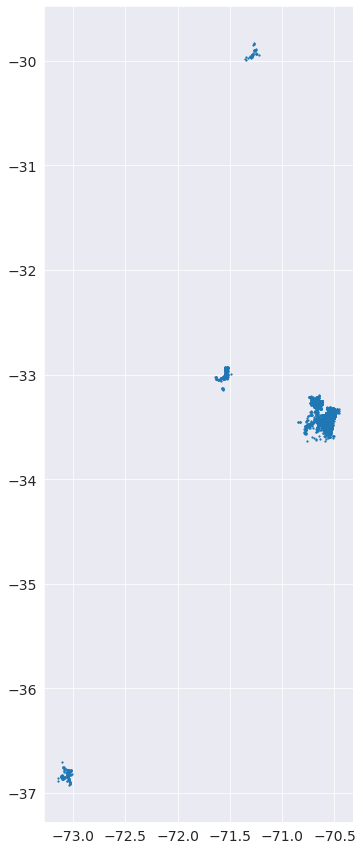

In [78]:
geo_data.plot(markersize = 1.5, figsize = (15,15))

In [79]:
geo_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 8000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   order_id         8000 non-null   object  
 1   lat              8000 non-null   float64 
 2   lng              8000 non-null   float64 
 3   promised_time    8000 non-null   object  
 4   on_demand        8000 non-null   bool    
 5   shopper_id       8000 non-null   object  
 6   store_branch_id  8000 non-null   object  
 7   total_minutes    8000 non-null   float64 
 8   geometry         8000 non-null   geometry
dtypes: bool(1), float64(3), geometry(1), object(4)
memory usage: 570.3+ KB


In [80]:
geo_data

,order_id,lat,lng,promised_time,on_demand,shopper_id,store_branch_id,total_minutes,geometry
0,e750294655c2c7c34d83cc3181c09de4,-33.501675,-70.579369,2019-10-18 20:48:00+00:00,True,e63bc83a1a952fa2b3cc9d558fb943cf,65ded5353c5ee48d0b7d48c591b8f430,67.684264,POINT (-70.57937 -33.50167)
1,6581174846221cb6c467348e87f57641,-33.440584,-70.556283,2019-10-19 01:00:00+00:00,False,195f9e9d84a4ba9033c4b6a756334d8b,45fbc6d3e05ebd93369ce542e8f2322d,57.060632,POINT (-70.55628 -33.44058)
3,7d2ed03fe4966083e74b12694b1669d8,-33.328075,-70.512659,2019-10-18 21:47:00+00:00,True,d0b3f6bf7e249e5ebb8d3129341773a2,f1748d6b0fd9d439f71450117eba2725,52.067742,POINT (-70.51266 -33.32807)
4,b4b2682d77118155fe4716300ccf7f39,-33.403239,-70.564020,2019-10-19 20:00:00+00:00,False,5c5199ce02f7b77caa9c2590a39ad27d,1f0e3dad99908345f7439f8ffabdffc4,140.724822,POINT (-70.56402 -33.40324)
6,2c036d7b5db4b3cb8abf44d9fa46b138,-33.447730,-70.573825,2019-10-19 14:50:00+00:00,True,5c15f25cf0be9893ad4780fa050d8fa3,5751ec3e9a4feab575962e78e006250d,45.535737,POINT (-70.57383 -33.44773)
...,...,...,...,...,...,...,...,...,...
9995,c63cfa783ff6ea9a5577ff0b513e4297,-33.417677,-70.508377,2019-10-19 01:00:00+00:00,False,9cf7b3c6a05745b24eb07e0945ff1718,c4ca4238a0b923820dcc509a6f75849b,116.631287,POINT (-70.50838 -33.41768)
9996,0b91a6dc570736f490ade9b129bbd46f,-33.432885,-70.646795,2019-10-19 19:00:00+00:00,False,6fd0c09e971aff77c73afb87863da1c6,3871bd64012152bfb53fdf04b401193f,94.094497,POINT (-70.64680 -33.43288)
9997,229d80f473668d9b25d60ea4d05687dd,-33.424562,-70.582943,2019-10-19 01:00:00+00:00,False,3ed51e3e0e8c9ca2fec3f84766cabe96,1f0e3dad99908345f7439f8ffabdffc4,53.784000,POINT (-70.58294 -33.42456)
9998,96e2a7a69e52eaa5ce563b1164f72c8d,-33.413806,-70.598500,2019-10-19 18:00:00+00:00,False,cea50f5aa525cfe6d2f445fec7c8ef31,1f0e3dad99908345f7439f8ffabdffc4,52.806311,POINT (-70.59850 -33.41381)


In [81]:
geo_data.geometry.area

0       0.0
1       0.0
3       0.0
4       0.0
6       0.0
       ... 
9995    0.0
9996    0.0
9997    0.0
9998    0.0
9999    0.0
Length: 8000, dtype: float64

In [82]:
geo_data.crs

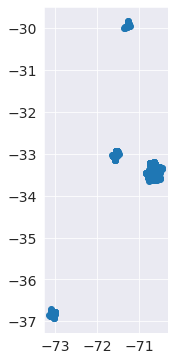

In [83]:
geo_data.plot()

Pase otro dataframe storebranch a geodataFrame que tenia lng lat que es storebranch donde se encuentran las tiendas 

In [84]:
geo_data_1 = gpd.GeoDataFrame(storebranch, geometry= gpd.points_from_xy(storebranch['lng'], storebranch['lat']))

In [85]:
geo_data_1

,store_branch_id,store_id,lat,lng,geometry
0,aff1621254f7c1be92f64550478c56e6,92cc227532d17e56e07902b254dfad10,-33.422497,-70.609231,POINT (-70.60923 -33.42250)
1,56352739f59643540a3a6e16985f62c7,0336dcbab05b9d5ad24f4333c7658a0e,-33.385484,-70.555579,POINT (-70.55558 -33.38548)
2,7d04bbbe5494ae9d2f5a76aa1c00fa2f,9bf31c7ff062936a96d3c8bd1f8f2ff3,-33.416579,-70.565224,POINT (-70.56522 -33.41658)
3,2b24d495052a8ce66358eb576b8912c8,c4ca4238a0b923820dcc509a6f75849b,-33.512578,-70.655952,POINT (-70.65595 -33.51258)
4,5487315b1286f907165907aa8fc96619,d82c8d1619ad8176d665453cfb2e55f0,-33.347645,-70.542229,POINT (-70.54223 -33.34764)
...,...,...,...,...,...
471,045117b0e0a11a242b9765e79cbf113f,a87ff679a2f3e71d9181a67b7542122c,-33.036111,-71.524149,POINT (-71.52415 -33.03611)
472,2cfa3753d6a524711acb5fce38eeca1a,3f67fd97162d20e6fe27748b5b372509,-33.406081,-70.598128,POINT (-70.59813 -33.40608)
473,7486cef2522ee03547cfb970a404a874,8f468c873a32bb0619eaeb2050ba45d1,-33.397498,-70.584666,POINT (-70.58467 -33.39750)
474,c06d06da9666a219db15cf575aff2824,9a1158154dfa42caddbd0694a4e9bdc8,-33.390604,-70.547206,POINT (-70.54721 -33.39060)


In [86]:
geo_data_1.nunique()

store_branch_id    476
store_id           221
lat                445
lng                444
geometry           446
dtype: int64

Encontramos que store id es la tiene varias que se repiten tiendas no como las otras

In [87]:
geo_data_store=geo_data_1.store_id.value_counts()

In [88]:
geo_data_store.sort_values(ascending= False).head(50)

c4ca4238a0b923820dcc509a6f75849b    33
9bf31c7ff062936a96d3c8bd1f8f2ff3    23
c0c7c76d30bd3dcaefc96f40275bdc0a    19
a87ff679a2f3e71d9181a67b7542122c    17
f899139df5e1059396431415e770c6dd    15
42a0e188f5033bc65bf8d78622277c4e    11
34173cb38f07f89ddbebc2ac9128303f    10
c9e1074f5b3f9fc8ea15d152add07294     8
084b6fbb10729ed4da8c3d3f5a3ae7c9     7
9a1158154dfa42caddbd0694a4e9bdc8     7
9778d5d219c5080b9a6a17bef029331c     6
735b90b4568125ed6c3f678819b6e058     6
65b9eea6e1cc6bb9f0cd2a47751a186f     6
fe131d7f5a6b38b23cc967316c13dae2     5
e369853df766fa44e1ed0ff613f563bd     5
9c01802ddb981e6bcfbec0f0516b8e35     5
1068c6e4c8051cfd4e9ea8072e3189e2     5
d1fe173d08e959397adf34b1d77e88d7     5
2a38a4a9316c49e5a833517c45d31070     5
6f4922f45568161a8cdf4ad2299f6d23     4
26657d5ff9020d2abefe558796b99584     4
f033ab37c30201f73f142449d037028d     4
1700002963a49da13542e0726b7bb758     4
918317b57931b6b7a7d29490fe5ec9f9     3
1ff8a7b5dc7a7d1f0ed65aaa29c04b1e     3
d645920e395fedad7bbbed0ec

In [89]:
geo_data_1.store_branch_id.value_counts()

30f8f6b940d1073d8b6a5eebc46dd6e5    1
bad5f33780c42f2588878a9d07405083    1
bffc98347ee35b3ead06728d6f073c68    1
7f5d04d189dfb634e6a85bb9d9adf21e    1
8cff9bf6694dccfc3b6a613d05d51d16    1
                                   ..
a9be4c2a4041cadbf9d61ae16dd1389e    1
a760880003e7ddedfef56acb3b09697f    1
7fb8ceb3bd59c7956b1df66729296a4c    1
5487315b1286f907165907aa8fc96619    1
18997733ec258a9fcaf239cc55d53363    1
Name: store_branch_id, Length: 476, dtype: int64

Se grafica eso y se encuentra bastante similar a lo anterior solo que con mucho menos datos de lat y lng comparado con geo_data

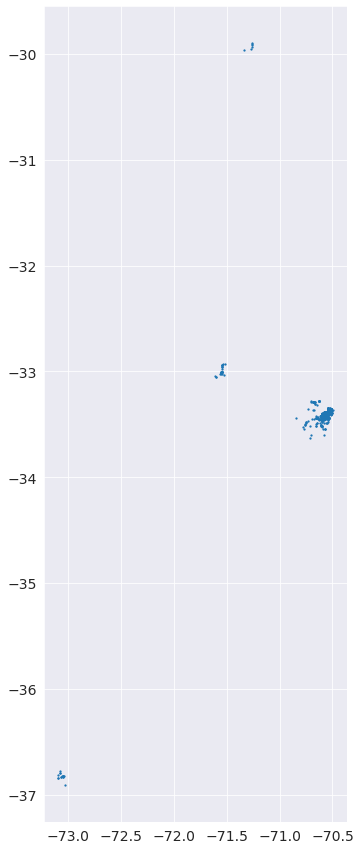

In [90]:
geo_data_1.plot(markersize = 1.5, figsize = (15,15))

In [91]:
geo_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 8000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   order_id         8000 non-null   object  
 1   lat              8000 non-null   float64 
 2   lng              8000 non-null   float64 
 3   promised_time    8000 non-null   object  
 4   on_demand        8000 non-null   bool    
 5   shopper_id       8000 non-null   object  
 6   store_branch_id  8000 non-null   object  
 7   total_minutes    8000 non-null   float64 
 8   geometry         8000 non-null   geometry
dtypes: bool(1), float64(3), geometry(1), object(4)
memory usage: 570.3+ KB


In [92]:
geo_data_1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   store_branch_id  476 non-null    object  
 1   store_id         476 non-null    object  
 2   lat              476 non-null    float64 
 3   lng              476 non-null    float64 
 4   geometry         476 non-null    geometry
dtypes: float64(2), geometry(1), object(2)
memory usage: 18.7+ KB


instalo mapclassify para crear mas detalles en mis figuras de geometry en los dos geodataframes que tienen geometry

In [93]:
!pip install mapclassify

grafico si se encuentra alguna relacion, label Y total minutes y el mapa 

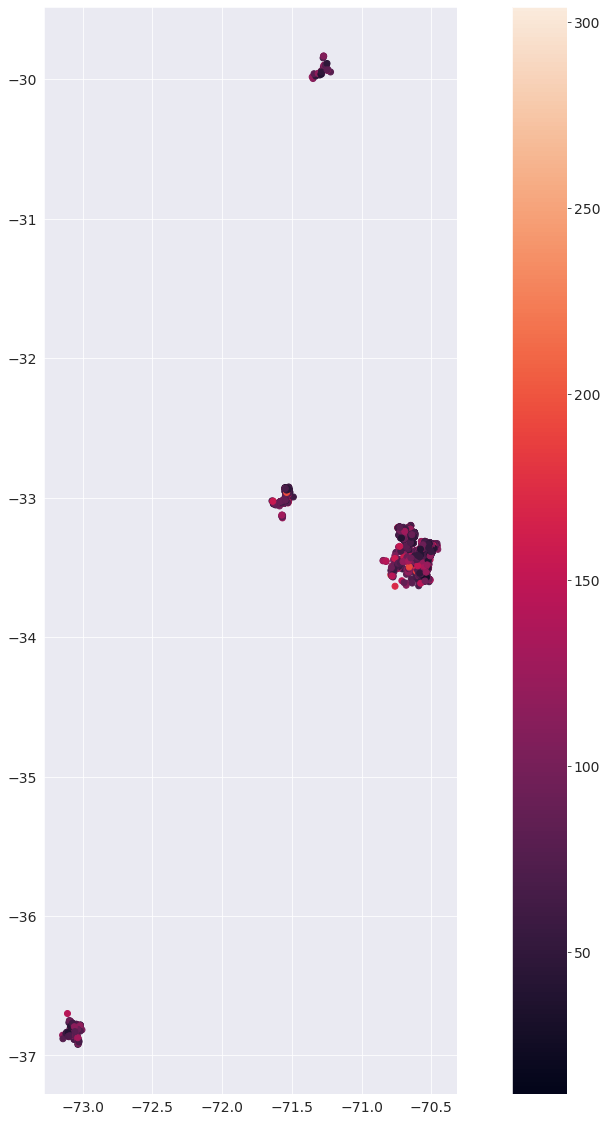

In [94]:
geo_data.plot(figsize=(20,20), column= 'total_minutes', legend=True);

intento ver si se encuentra una relacion si es vista si divido el total_minutes en 6 si se encuentran algunas relaciones  lo mismo en on_demand solo que aqui hay solo 2 categorias

In [95]:
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt

import numpy as np

import shapely.geometry as geom

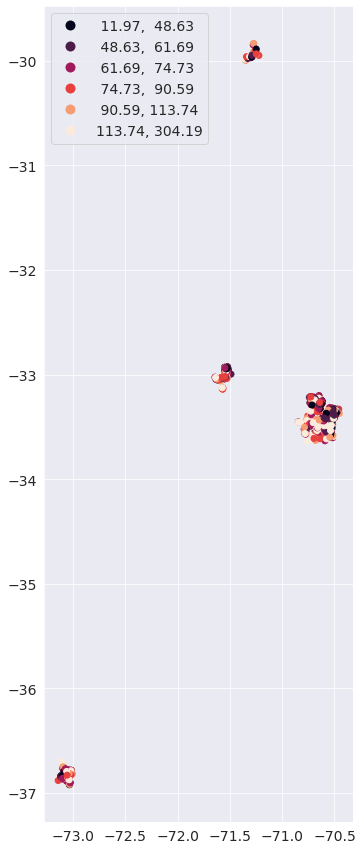

In [96]:
fig, ax = plt.subplots(figsize=(15,15), subplot_kw={'aspect':'equal'})
geo_data.plot(column='total_minutes', scheme='Quantiles', k=6, legend=True, ax=ax)

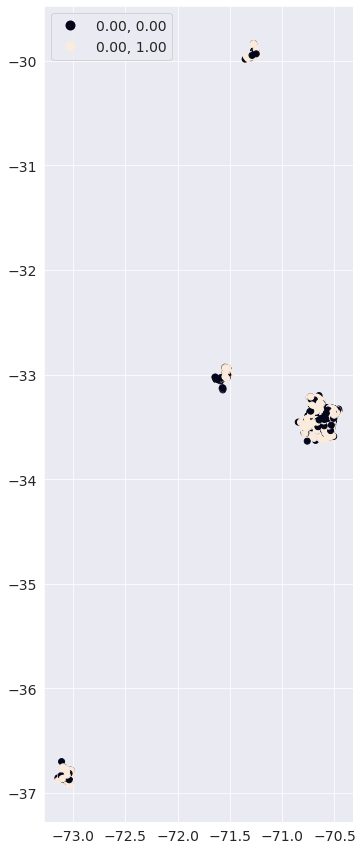

In [97]:
fig, ax = plt.subplots(figsize=(15,15), subplot_kw={'aspect':'equal'})
geo_data.plot(column='on_demand', scheme='Quantiles', k=2, legend=True, ax=ax)

In [98]:
geo_data

,order_id,lat,lng,promised_time,on_demand,shopper_id,store_branch_id,total_minutes,geometry
0,e750294655c2c7c34d83cc3181c09de4,-33.501675,-70.579369,2019-10-18 20:48:00+00:00,True,e63bc83a1a952fa2b3cc9d558fb943cf,65ded5353c5ee48d0b7d48c591b8f430,67.684264,POINT (-70.57937 -33.50167)
1,6581174846221cb6c467348e87f57641,-33.440584,-70.556283,2019-10-19 01:00:00+00:00,False,195f9e9d84a4ba9033c4b6a756334d8b,45fbc6d3e05ebd93369ce542e8f2322d,57.060632,POINT (-70.55628 -33.44058)
3,7d2ed03fe4966083e74b12694b1669d8,-33.328075,-70.512659,2019-10-18 21:47:00+00:00,True,d0b3f6bf7e249e5ebb8d3129341773a2,f1748d6b0fd9d439f71450117eba2725,52.067742,POINT (-70.51266 -33.32807)
4,b4b2682d77118155fe4716300ccf7f39,-33.403239,-70.564020,2019-10-19 20:00:00+00:00,False,5c5199ce02f7b77caa9c2590a39ad27d,1f0e3dad99908345f7439f8ffabdffc4,140.724822,POINT (-70.56402 -33.40324)
6,2c036d7b5db4b3cb8abf44d9fa46b138,-33.447730,-70.573825,2019-10-19 14:50:00+00:00,True,5c15f25cf0be9893ad4780fa050d8fa3,5751ec3e9a4feab575962e78e006250d,45.535737,POINT (-70.57383 -33.44773)
...,...,...,...,...,...,...,...,...,...
9995,c63cfa783ff6ea9a5577ff0b513e4297,-33.417677,-70.508377,2019-10-19 01:00:00+00:00,False,9cf7b3c6a05745b24eb07e0945ff1718,c4ca4238a0b923820dcc509a6f75849b,116.631287,POINT (-70.50838 -33.41768)
9996,0b91a6dc570736f490ade9b129bbd46f,-33.432885,-70.646795,2019-10-19 19:00:00+00:00,False,6fd0c09e971aff77c73afb87863da1c6,3871bd64012152bfb53fdf04b401193f,94.094497,POINT (-70.64680 -33.43288)
9997,229d80f473668d9b25d60ea4d05687dd,-33.424562,-70.582943,2019-10-19 01:00:00+00:00,False,3ed51e3e0e8c9ca2fec3f84766cabe96,1f0e3dad99908345f7439f8ffabdffc4,53.784000,POINT (-70.58294 -33.42456)
9998,96e2a7a69e52eaa5ce563b1164f72c8d,-33.413806,-70.598500,2019-10-19 18:00:00+00:00,False,cea50f5aa525cfe6d2f445fec7c8ef31,1f0e3dad99908345f7439f8ffabdffc4,52.806311,POINT (-70.59850 -33.41381)


In [99]:
geo_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 8000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   order_id         8000 non-null   object  
 1   lat              8000 non-null   float64 
 2   lng              8000 non-null   float64 
 3   promised_time    8000 non-null   object  
 4   on_demand        8000 non-null   bool    
 5   shopper_id       8000 non-null   object  
 6   store_branch_id  8000 non-null   object  
 7   total_minutes    8000 non-null   float64 
 8   geometry         8000 non-null   geometry
dtypes: bool(1), float64(3), geometry(1), object(4)
memory usage: 570.3+ KB


# feature engineering
mediante pandas pasar la fecha a que se encuentra como object a datetime que luego descompondremos como feature engineering

In [100]:
geo_data['promised_time']= pd.to_datetime(geo_data.promised_time)

In [101]:
geo_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 8000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   order_id         8000 non-null   object             
 1   lat              8000 non-null   float64            
 2   lng              8000 non-null   float64            
 3   promised_time    8000 non-null   datetime64[ns, UTC]
 4   on_demand        8000 non-null   bool               
 5   shopper_id       8000 non-null   object             
 6   store_branch_id  8000 non-null   object             
 7   total_minutes    8000 non-null   float64            
 8   geometry         8000 non-null   geometry           
dtypes: bool(1), datetime64[ns, UTC](1), float64(3), geometry(1), object(3)
memory usage: 570.3+ KB


In [102]:
geo_data.promised_time.value_counts().nunique

<bound method IndexOpsMixin.nunique of 2019-10-19 17:00:00+00:00    534
2019-10-19 16:00:00+00:00    503
2019-10-19 14:00:00+00:00    483
2019-10-19 18:00:00+00:00    478
2019-10-19 19:00:00+00:00    374
                            ... 
2019-10-19 14:53:00+00:00      1
2019-10-19 22:06:00+00:00      1
2019-10-19 20:16:00+00:00      1
2019-10-19 17:07:00+00:00      1
2019-10-19 18:36:00+00:00      1
Name: promised_time, Length: 852, dtype: int64>

descomponer la columna promised_time con pandas en year, month, day, weekday, hour y minute. Luego veremos que sirve y que no 

In [103]:
geo_data['year'] = pd.DatetimeIndex(geo_data.promised_time).year
geo_data['month'] = pd.DatetimeIndex(geo_data.promised_time).month
geo_data['day'] = pd.DatetimeIndex(geo_data.promised_time).day
geo_data['weekday'] = pd.DatetimeIndex(geo_data.promised_time).weekday
geo_data['hour'] = pd.DatetimeIndex(geo_data.promised_time).hour
geo_data['minute'] = pd.DatetimeIndex(geo_data.promised_time).minute

In [104]:
geo_data

,order_id,lat,lng,promised_time,on_demand,shopper_id,store_branch_id,total_minutes,geometry,year,month,day,weekday,hour,minute
0,e750294655c2c7c34d83cc3181c09de4,-33.501675,-70.579369,2019-10-18 20:48:00+00:00,True,e63bc83a1a952fa2b3cc9d558fb943cf,65ded5353c5ee48d0b7d48c591b8f430,67.684264,POINT (-70.57937 -33.50167),2019,10,18,4,20,48
1,6581174846221cb6c467348e87f57641,-33.440584,-70.556283,2019-10-19 01:00:00+00:00,False,195f9e9d84a4ba9033c4b6a756334d8b,45fbc6d3e05ebd93369ce542e8f2322d,57.060632,POINT (-70.55628 -33.44058),2019,10,19,5,1,0
3,7d2ed03fe4966083e74b12694b1669d8,-33.328075,-70.512659,2019-10-18 21:47:00+00:00,True,d0b3f6bf7e249e5ebb8d3129341773a2,f1748d6b0fd9d439f71450117eba2725,52.067742,POINT (-70.51266 -33.32807),2019,10,18,4,21,47
4,b4b2682d77118155fe4716300ccf7f39,-33.403239,-70.564020,2019-10-19 20:00:00+00:00,False,5c5199ce02f7b77caa9c2590a39ad27d,1f0e3dad99908345f7439f8ffabdffc4,140.724822,POINT (-70.56402 -33.40324),2019,10,19,5,20,0
6,2c036d7b5db4b3cb8abf44d9fa46b138,-33.447730,-70.573825,2019-10-19 14:50:00+00:00,True,5c15f25cf0be9893ad4780fa050d8fa3,5751ec3e9a4feab575962e78e006250d,45.535737,POINT (-70.57383 -33.44773),2019,10,19,5,14,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,c63cfa783ff6ea9a5577ff0b513e4297,-33.417677,-70.508377,2019-10-19 01:00:00+00:00,False,9cf7b3c6a05745b24eb07e0945ff1718,c4ca4238a0b923820dcc509a6f75849b,116.631287,POINT (-70.50838 -33.41768),2019,10,19,5,1,0
9996,0b91a6dc570736f490ade9b129bbd46f,-33.432885,-70.646795,2019-10-19 19:00:00+00:00,False,6fd0c09e971aff77c73afb87863da1c6,3871bd64012152bfb53fdf04b401193f,94.094497,POINT (-70.64680 -33.43288),2019,10,19,5,19,0
9997,229d80f473668d9b25d60ea4d05687dd,-33.424562,-70.582943,2019-10-19 01:00:00+00:00,False,3ed51e3e0e8c9ca2fec3f84766cabe96,1f0e3dad99908345f7439f8ffabdffc4,53.784000,POINT (-70.58294 -33.42456),2019,10,19,5,1,0
9998,96e2a7a69e52eaa5ce563b1164f72c8d,-33.413806,-70.598500,2019-10-19 18:00:00+00:00,False,cea50f5aa525cfe6d2f445fec7c8ef31,1f0e3dad99908345f7439f8ffabdffc4,52.806311,POINT (-70.59850 -33.41381),2019,10,19,5,18,0


solo el año 2019

In [105]:
geo_data.year.value_counts().nunique()

1

creo un datafrme solo con la data de tiempo de geodata para poder trabajar con ella en un dataframe mas pequeño

In [106]:
time_c =['total_minutes','minute','hour','promised_time','on_demand' ,'year','month','day','weekday' ]

In [107]:
time_df= geo_data[time_c]

In [108]:
time_df[time_df.on_demand==True].head(50)

,total_minutes,minute,hour,promised_time,on_demand,year,month,day,weekday
0,67.684264,48,20,2019-10-18 20:48:00+00:00,True,2019,10,18,4
3,52.067742,47,21,2019-10-18 21:47:00+00:00,True,2019,10,18,4
6,45.535737,50,14,2019-10-19 14:50:00+00:00,True,2019,10,19,5
8,72.446429,18,21,2019-10-18 21:18:00+00:00,True,2019,10,18,4
11,27.811007,16,16,2019-10-19 16:16:00+00:00,True,2019,10,19,5
24,71.534194,26,21,2019-10-18 21:26:00+00:00,True,2019,10,18,4
25,48.764227,20,22,2019-10-18 22:20:00+00:00,True,2019,10,18,4
27,38.050480,21,20,2019-10-18 20:21:00+00:00,True,2019,10,18,4
29,51.237690,13,16,2019-10-19 16:13:00+00:00,True,2019,10,19,5
34,80.802230,48,0,2019-10-19 00:48:00+00:00,True,2019,10,19,5


# Eliminar outlyers
se va eliminar si on_demand es True y son menos de 5 minutos en entregar porque probablemnte no es posible

In [109]:
time_df[(time_df.on_demand==True)&(time_df.minute<5)]

,total_minutes,minute,hour,promised_time,on_demand,year,month,day,weekday
43,80.565029,0,16,2019-10-19 16:00:00+00:00,True,2019,10,19,5
70,97.978993,1,23,2019-10-19 23:01:00+00:00,True,2019,10,19,5
127,47.118124,2,21,2019-10-18 21:02:00+00:00,True,2019,10,18,4
147,133.154638,3,19,2019-10-19 19:03:00+00:00,True,2019,10,19,5
151,32.669938,0,1,2019-10-19 01:00:00+00:00,True,2019,10,19,5
...,...,...,...,...,...,...,...,...,...
9807,44.309158,3,22,2019-10-18 22:03:00+00:00,True,2019,10,18,4
9876,65.391270,2,16,2019-10-19 16:02:00+00:00,True,2019,10,19,5
9935,60.038749,4,22,2019-10-18 22:04:00+00:00,True,2019,10,18,4
9977,50.490393,3,17,2019-10-19 17:03:00+00:00,True,2019,10,19,5


In [110]:
geo_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 8000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   order_id         8000 non-null   object             
 1   lat              8000 non-null   float64            
 2   lng              8000 non-null   float64            
 3   promised_time    8000 non-null   datetime64[ns, UTC]
 4   on_demand        8000 non-null   bool               
 5   shopper_id       8000 non-null   object             
 6   store_branch_id  8000 non-null   object             
 7   total_minutes    8000 non-null   float64            
 8   geometry         8000 non-null   geometry           
 9   year             8000 non-null   int64              
 10  month            8000 non-null   int64              
 11  day              8000 non-null   int64              
 12  weekday          8000 non-null   int64              
 13  hour      

tambien se elimino estos tiempos que on_demand False que se promete tiempo cuando no se deberia 

In [111]:
time_df[time_df.on_demand==False].head(50)

,total_minutes,minute,hour,promised_time,on_demand,year,month,day,weekday
1,57.060632,0,1,2019-10-19 01:00:00+00:00,False,2019,10,19,5
4,140.724822,0,20,2019-10-19 20:00:00+00:00,False,2019,10,19,5
7,121.394073,0,2,2019-10-19 02:00:00+00:00,False,2019,10,19,5
10,30.524747,0,13,2019-10-19 13:00:00+00:00,False,2019,10,19,5
13,101.367248,0,15,2019-10-19 15:00:00+00:00,False,2019,10,19,5
14,92.129777,0,16,2019-10-19 16:00:00+00:00,False,2019,10,19,5
15,98.662305,0,0,2019-10-19 00:00:00+00:00,False,2019,10,19,5
16,114.140539,0,17,2019-10-19 17:00:00+00:00,False,2019,10,19,5
17,101.638218,0,18,2019-10-19 18:00:00+00:00,False,2019,10,19,5
20,122.239210,0,16,2019-10-19 16:00:00+00:00,False,2019,10,19,5


In [112]:
time_df[(time_df.on_demand==False)&(time_df.minute>0)]

,total_minutes,minute,hour,promised_time,on_demand,year,month,day,weekday
503,98.066983,30,13,2019-10-19 13:30:00+00:00,False,2019,10,19,5
784,106.917707,30,15,2019-10-19 15:30:00+00:00,False,2019,10,19,5
933,54.671659,30,23,2019-10-18 23:30:00+00:00,False,2019,10,18,4
973,68.449404,34,14,2019-10-19 14:34:00+00:00,False,2019,10,19,5
1217,98.419721,30,22,2019-10-18 22:30:00+00:00,False,2019,10,18,4
1579,118.112446,30,19,2019-10-19 19:30:00+00:00,False,2019,10,19,5
2490,66.421097,30,13,2019-10-19 13:30:00+00:00,False,2019,10,19,5
2666,81.975492,30,15,2019-10-19 15:30:00+00:00,False,2019,10,19,5
3092,99.029978,30,13,2019-10-19 13:30:00+00:00,False,2019,10,19,5
3200,77.336876,30,14,2019-10-19 14:30:00+00:00,False,2019,10,19,5


eliminamos esas rows explicadas anteriormente 

In [113]:
geo_data.drop(geo_data[(geo_data.on_demand==True)&(geo_data.minute<5)].index, inplace=True)

In [114]:
geo_data.drop(geo_data[(geo_data.on_demand==False)&(geo_data.minute>0)].index, inplace=True)

In [115]:
geo_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 7705 entries, 0 to 9998
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   order_id         7705 non-null   object             
 1   lat              7705 non-null   float64            
 2   lng              7705 non-null   float64            
 3   promised_time    7705 non-null   datetime64[ns, UTC]
 4   on_demand        7705 non-null   bool               
 5   shopper_id       7705 non-null   object             
 6   store_branch_id  7705 non-null   object             
 7   total_minutes    7705 non-null   float64            
 8   geometry         7705 non-null   geometry           
 9   year             7705 non-null   int64              
 10  month            7705 non-null   int64              
 11  day              7705 non-null   int64              
 12  weekday          7705 non-null   int64              
 13  hour      

Se eliminaron los datos q no tenian sentido y se quedo 7705 datos correctos 

In [116]:
time_df.on_demand.value_counts()

False    4362
True     3638
Name: on_demand, dtype: int64

solo un mes

In [117]:
time_df.month.nunique()

1

y ocurren 3 dias 

In [118]:
time_df.day.value_counts()

19    5673
18    2326
20       1
Name: day, dtype: int64

Viernes Sabado y Domingo

In [119]:
time_df.weekday.value_counts()

5    5673
4    2326
6       1
Name: weekday, dtype: int64

In [120]:
geo_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 7705 entries, 0 to 9998
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   order_id         7705 non-null   object             
 1   lat              7705 non-null   float64            
 2   lng              7705 non-null   float64            
 3   promised_time    7705 non-null   datetime64[ns, UTC]
 4   on_demand        7705 non-null   bool               
 5   shopper_id       7705 non-null   object             
 6   store_branch_id  7705 non-null   object             
 7   total_minutes    7705 non-null   float64            
 8   geometry         7705 non-null   geometry           
 9   year             7705 non-null   int64              
 10  month            7705 non-null   int64              
 11  day              7705 non-null   int64              
 12  weekday          7705 non-null   int64              
 13  hour      

In [121]:
geo_data_1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   store_branch_id  476 non-null    object  
 1   store_id         476 non-null    object  
 2   lat              476 non-null    float64 
 3   lng              476 non-null    float64 
 4   geometry         476 non-null    geometry
dtypes: float64(2), geometry(1), object(2)
memory usage: 18.7+ KB


unir los datos ya modificados todos en uno 

In [122]:
order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198500 entries, 0 to 198499
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   order_id    198500 non-null  object 
 1   product_id  198500 non-null  object 
 2   quantity    198500 non-null  float64
 3   buy_unit    198500 non-null  object 
dtypes: float64(1), object(3)
memory usage: 6.1+ MB


In [123]:
geo_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 7705 entries, 0 to 9998
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   order_id         7705 non-null   object             
 1   lat              7705 non-null   float64            
 2   lng              7705 non-null   float64            
 3   promised_time    7705 non-null   datetime64[ns, UTC]
 4   on_demand        7705 non-null   bool               
 5   shopper_id       7705 non-null   object             
 6   store_branch_id  7705 non-null   object             
 7   total_minutes    7705 non-null   float64            
 8   geometry         7705 non-null   geometry           
 9   year             7705 non-null   int64              
 10  month            7705 non-null   int64              
 11  day              7705 non-null   int64              
 12  weekday          7705 non-null   int64              
 13  hour      

In [124]:
merge_df_f =order_products.merge(geo_data,on ='order_id')

In [125]:
merge_df_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157764 entries, 0 to 158307
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   order_id         157764 non-null  object 
 1   product_id       157764 non-null  object 
 2   quantity         157764 non-null  float64
 3   buy_unit         157764 non-null  object 
 4   lat_x            157764 non-null  float64
 5   lng_x            157764 non-null  float64
 6   promised_time    157764 non-null  object 
 7   on_demand        157764 non-null  bool   
 8   shopper_id       157764 non-null  object 
 9   store_branch_id  157764 non-null  object 
 10  total_minutes    157764 non-null  float64
 11  seniority        157764 non-null  object 
 12  found_rate       156442 non-null  float64
 13  picking_speed    157764 non-null  float64
 14  accepted_rate    157764 non-null  float64
 15  rating           156620 non-null  float64
 16  store_id         157764 non-null  obje

In [126]:
merge_df_5['rating'].fillna((merge_df_5['rating'].mean()), inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [127]:
merge_df_5['found_rate'].fillna((merge_df_5['found_rate'].mean()), inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [128]:
merge_df_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157764 entries, 0 to 158307
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   order_id         157764 non-null  object 
 1   product_id       157764 non-null  object 
 2   quantity         157764 non-null  float64
 3   buy_unit         157764 non-null  object 
 4   lat_x            157764 non-null  float64
 5   lng_x            157764 non-null  float64
 6   promised_time    157764 non-null  object 
 7   on_demand        157764 non-null  bool   
 8   shopper_id       157764 non-null  object 
 9   store_branch_id  157764 non-null  object 
 10  total_minutes    157764 non-null  float64
 11  seniority        157764 non-null  object 
 12  found_rate       157764 non-null  float64
 13  picking_speed    157764 non-null  float64
 14  accepted_rate    157764 non-null  float64
 15  rating           157764 non-null  float64
 16  store_id         157764 non-null  obje

lo anterior hubo mucho que no ocuparemos que me enseño a ver la data por encima ahora unire la data que si voy a ocupar hasta el final

In [129]:
merge_df1 = order_products.merge(geo_data, on = 'order_id')

In [130]:
merge_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153563 entries, 0 to 153562
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   order_id         153563 non-null  object             
 1   product_id       153563 non-null  object             
 2   quantity         153563 non-null  float64            
 3   buy_unit         153563 non-null  object             
 4   lat              153563 non-null  float64            
 5   lng              153563 non-null  float64            
 6   promised_time    153563 non-null  datetime64[ns, UTC]
 7   on_demand        153563 non-null  bool               
 8   shopper_id       153563 non-null  object             
 9   store_branch_id  153563 non-null  object             
 10  total_minutes    153563 non-null  float64            
 11  geometry         153563 non-null  geometry           
 12  year             153563 non-null  int64              
 13 

In [131]:
merge_df2= merge_df1.merge(shopper_1, on='shopper_id')

In [132]:
merge_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153021 entries, 0 to 153020
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   order_id         153021 non-null  object             
 1   product_id       153021 non-null  object             
 2   quantity         153021 non-null  float64            
 3   buy_unit         153021 non-null  object             
 4   lat              153021 non-null  float64            
 5   lng              153021 non-null  float64            
 6   promised_time    153021 non-null  datetime64[ns, UTC]
 7   on_demand        153021 non-null  bool               
 8   shopper_id       153021 non-null  object             
 9   store_branch_id  153021 non-null  object             
 10  total_minutes    153021 non-null  float64            
 11  geometry         153021 non-null  geometry           
 12  year             153021 non-null  int64              
 13 

In [133]:
merge_df3= merge_df2.merge(geo_data_1, on='store_branch_id')

In [134]:
merge_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153021 entries, 0 to 153020
Data columns (total 27 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   order_id         153021 non-null  object             
 1   product_id       153021 non-null  object             
 2   quantity         153021 non-null  float64            
 3   buy_unit         153021 non-null  object             
 4   lat_x            153021 non-null  float64            
 5   lng_x            153021 non-null  float64            
 6   promised_time    153021 non-null  datetime64[ns, UTC]
 7   on_demand        153021 non-null  bool               
 8   shopper_id       153021 non-null  object             
 9   store_branch_id  153021 non-null  object             
 10  total_minutes    153021 non-null  float64            
 11  geometry_x       153021 non-null  geometry           
 12  year             153021 non-null  int64              
 13 

In [135]:
merge_df3.seniority.value_counts()


6c90661e6d2c7579f5ce337c3391dbb9    109235
50e13ee63f086c2fe84229348bc91b5b     26034
41dc7c9e385c4d2b6c1f7836973951bf     16898
bb29b8d0d196b5db5a5350e5e3ae2b1f       854
Name: seniority, dtype: int64

## pasar data categorica a numerica 
vamos asumir q a medida q hay mas personas el nivel de seniority baja, y buy_unit y on_demand con 0 y 1

In [136]:
merge_df3.on_demand.value_counts()

False    99361
True     53660
Name: on_demand, dtype: int64

In [137]:
seniority_value={'6c90661e6d2c7579f5ce337c3391dbb9':0,
                 '50e13ee63f086c2fe84229348bc91b5b':1,
                 '41dc7c9e385c4d2b6c1f7836973951bf':2,
                 'bb29b8d0d196b5db5a5350e5e3ae2b1f':3}
merge_df3['seniority']= merge_df3.seniority.map(seniority_value)

In [138]:
buy_unit_value={'UN':0,
                'KG':1}
merge_df3['buy_unit']= merge_df3.buy_unit.map(buy_unit_value)

In [139]:
merge_df3['on_demand'] = merge_df3.on_demand.replace({False:0,True:1})

In [140]:
merge_df3.on_demand.value_counts()

0    99361
1    53660
Name: on_demand, dtype: int64

In [141]:
merge_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153021 entries, 0 to 153020
Data columns (total 27 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   order_id         153021 non-null  object             
 1   product_id       153021 non-null  object             
 2   quantity         153021 non-null  float64            
 3   buy_unit         153021 non-null  int64              
 4   lat_x            153021 non-null  float64            
 5   lng_x            153021 non-null  float64            
 6   promised_time    153021 non-null  datetime64[ns, UTC]
 7   on_demand        153021 non-null  int64              
 8   shopper_id       153021 non-null  object             
 9   store_branch_id  153021 non-null  object             
 10  total_minutes    153021 non-null  float64            
 11  geometry_x       153021 non-null  geometry           
 12  year             153021 non-null  int64              
 13 

In [142]:
merge_df3

,order_id,product_id,quantity,buy_unit,lat_x,lng_x,promised_time,on_demand,shopper_id,store_branch_id,total_minutes,geometry_x,year,month,day,weekday,hour,minute,seniority,found_rate,picking_speed,accepted_rate,rating,store_id,lat_y,lng_y,geometry_y
0,689d8866915acf87e851c2591a23a82f,43cc2b100bec640fe563cd16f2db669f,1.0,1,-33.279422,-70.623750,2019-10-19 15:59:00+00:00,1,a4118092dbfe7836201ef6a8f4774f3f,7ef605fc8dba5425d6965fbd4c8fbe1f,91.855363,POINT (-70.62375 -33.27942),2019,10,19,5,15,59,1,0.8402,1.88,0.76,4.68,c4ca4238a0b923820dcc509a6f75849b,-33.276853,-70.628167,POINT (-70.62817 -33.27685)
1,689d8866915acf87e851c2591a23a82f,58aaa613441ab56d0ae7e405fbf72f85,1.0,0,-33.279422,-70.623750,2019-10-19 15:59:00+00:00,1,a4118092dbfe7836201ef6a8f4774f3f,7ef605fc8dba5425d6965fbd4c8fbe1f,91.855363,POINT (-70.62375 -33.27942),2019,10,19,5,15,59,1,0.8402,1.88,0.76,4.68,c4ca4238a0b923820dcc509a6f75849b,-33.276853,-70.628167,POINT (-70.62817 -33.27685)
2,689d8866915acf87e851c2591a23a82f,cd0dce8fca267bf1fb86cf43e18d5598,1.0,0,-33.279422,-70.623750,2019-10-19 15:59:00+00:00,1,a4118092dbfe7836201ef6a8f4774f3f,7ef605fc8dba5425d6965fbd4c8fbe1f,91.855363,POINT (-70.62375 -33.27942),2019,10,19,5,15,59,1,0.8402,1.88,0.76,4.68,c4ca4238a0b923820dcc509a6f75849b,-33.276853,-70.628167,POINT (-70.62817 -33.27685)
3,689d8866915acf87e851c2591a23a82f,1fba6e9254d8a0ae8706eb2560545949,1.0,0,-33.279422,-70.623750,2019-10-19 15:59:00+00:00,1,a4118092dbfe7836201ef6a8f4774f3f,7ef605fc8dba5425d6965fbd4c8fbe1f,91.855363,POINT (-70.62375 -33.27942),2019,10,19,5,15,59,1,0.8402,1.88,0.76,4.68,c4ca4238a0b923820dcc509a6f75849b,-33.276853,-70.628167,POINT (-70.62817 -33.27685)
4,689d8866915acf87e851c2591a23a82f,9c9fb9c493c51d7d9e0beff68b9c7171,2.0,0,-33.279422,-70.623750,2019-10-19 15:59:00+00:00,1,a4118092dbfe7836201ef6a8f4774f3f,7ef605fc8dba5425d6965fbd4c8fbe1f,91.855363,POINT (-70.62375 -33.27942),2019,10,19,5,15,59,1,0.8402,1.88,0.76,4.68,c4ca4238a0b923820dcc509a6f75849b,-33.276853,-70.628167,POINT (-70.62817 -33.27685)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153016,61619dedbf5936abf1054e3ee1522541,76fb98c3816c0ccaa2a342cdfbb9a7a7,1.0,0,-33.528487,-70.575965,2019-10-19 15:07:00+00:00,1,ead96260c08f5732b3bb56c15ea27676,a00e5eb0973d24649a4a920fc53d9564,34.463592,POINT (-70.57597 -33.52849),2019,10,19,5,15,7,1,0.8874,2.06,0.84,4.94,6da9003b743b65f4c0ccd295cc484e57,-33.509822,-70.608103,POINT (-70.60810 -33.50982)
153017,15d863eee237ba57f89263a9941ea040,4cb546f1a7207bcd70d364f69dcbee26,1.0,0,-33.435545,-70.599763,2019-10-19 15:46:00+00:00,1,301423279fb6d985c42ea0a9842fafa3,4f398cb9d6bc79ae567298335b51ba8a,64.300455,POINT (-70.59976 -33.43554),2019,10,19,5,15,46,1,0.7973,2.50,1.00,4.68,e96ed478dab8595a7dbda4cbcbee168f,-33.422494,-70.611733,POINT (-70.61173 -33.42249)
153018,b9a4f78236dfdbc75e430dec375d8220,b1f384be86349e7d1775a9b14b88fbde,2.0,0,-33.418285,-70.615892,2019-10-19 14:00:00+00:00,0,6545fa53a0ae9d0f2444a51e793c5e7e,fa84632d742f2729dc32ce8cb5d49733,107.024610,POINT (-70.61589 -33.41828),2019,10,19,5,14,0,0,0.8214,2.00,0.96,4.88,3806734b256c27e41ec2c6bffa26d9e7,-33.385168,-70.574885,POINT (-70.57488 -33.38517)
153019,b9a4f78236dfdbc75e430dec375d8220,05f715d1002a5185b0c6ae576e3877ed,1.0,0,-33.418285,-70.615892,2019-10-19 14:00:00+00:00,0,6545fa53a0ae9d0f2444a51e793c5e7e,fa84632d742f2729dc32ce8cb5d49733,107.024610,POINT (-70.61589 -33.41828),2019,10,19,5,14,0,0,0.8214,2.00,0.96,4.88,3806734b256c27e41ec2c6bffa26d9e7,-33.385168,-70.574885,POINT (-70.57488 -33.38517)


In [143]:
merge_df3.nunique()

order_id            7649
product_id         13897
quantity             430
buy_unit               2
lat_x               6516
lng_x               6480
promised_time        796
on_demand              2
shopper_id          2683
store_branch_id      422
total_minutes       7649
geometry_x          6556
year                   1
month                  1
day                    3
weekday                3
hour                  16
minute                56
seniority              4
found_rate          1061
picking_speed        296
accepted_rate         90
rating                56
store_id             198
lat_y                399
lng_y                398
geometry_y           400
dtype: int64

normalizar las latitudes pasandolas a radian por medio de numpy para que sea mas compacto los numeros para alimentarlo al algoritmo de machine learning

In [144]:
import numpy as np

In [145]:
merge_df3['lat_x']= np.radians(merge_df3['lat_x'])
merge_df3['lng_x']= np.radians(merge_df3['lng_x'])
merge_df3['lat_y']= np.radians(merge_df3['lat_y'])
merge_df3['lng_y']= np.radians(merge_df3['lng_y'])

In [146]:
merge_df3[['lat_x','lng_x','lat_y','lng_y']]

,lat_x,lng_x,lat_y,lng_y
0,-0.580835,-1.232617,-0.580791,-1.232694
1,-0.580835,-1.232617,-0.580791,-1.232694
2,-0.580835,-1.232617,-0.580791,-1.232694
3,-0.580835,-1.232617,-0.580791,-1.232694
4,-0.580835,-1.232617,-0.580791,-1.232694
...,...,...,...,...
153016,-0.585183,-1.231783,-0.584857,-1.232344
153017,-0.583560,-1.232198,-0.583333,-1.232407
153018,-0.583259,-1.232480,-0.582681,-1.231764
153019,-0.583259,-1.232480,-0.582681,-1.231764


se ve mucho mejor y  mas compacto para agregar al modelo de machine learning

In [147]:
merge_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153021 entries, 0 to 153020
Data columns (total 27 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   order_id         153021 non-null  object             
 1   product_id       153021 non-null  object             
 2   quantity         153021 non-null  float64            
 3   buy_unit         153021 non-null  int64              
 4   lat_x            153021 non-null  float64            
 5   lng_x            153021 non-null  float64            
 6   promised_time    153021 non-null  datetime64[ns, UTC]
 7   on_demand        153021 non-null  int64              
 8   shopper_id       153021 non-null  object             
 9   store_branch_id  153021 non-null  object             
 10  total_minutes    153021 non-null  float64            
 11  geometry_x       153021 non-null  geometry           
 12  year             153021 non-null  int64              
 13 

In [148]:
merge_df3.describe()

,quantity,buy_unit,lat_x,lng_x,on_demand,total_minutes,year,month,day,weekday,hour,minute,seniority,found_rate,picking_speed,accepted_rate,rating,lat_y,lng_y
count,153021.000000,153021.000000,153021.000000,153021.000000,153021.000000,153021.000000,153021.0,153021.0,153021.000000,153021.000000,153021.000000,153021.000000,153021.000000,153021.000000,153021.000000,153021.000000,153021.000000,153021.000000,153021.000000
mean,1.820937,0.089465,-0.583657,-1.233581,0.350671,98.452338,2019.0,10.0,18.760523,4.760523,15.921730,11.257461,0.407735,0.865361,1.563285,0.925653,4.847125,-0.583746,-1.233455
std,1.873689,0.285414,0.010224,0.007387,0.477182,37.576393,0.0,0.0,0.427347,0.427347,6.416262,18.032680,0.704155,0.028412,0.534945,0.090850,0.128151,0.010167,0.007398
min,0.055000,0.000000,-0.644389,-1.276609,0.000000,11.969489,2019.0,10.0,18.000000,4.000000,0.000000,0.000000,0.000000,0.737300,0.650000,0.240000,3.880000,-0.642959,-1.275777
25%,1.000000,0.000000,-0.583484,-1.232399,0.000000,70.815224,2019.0,10.0,19.000000,5.000000,15.000000,0.000000,0.000000,0.849100,1.220000,0.880000,4.780000,-0.583660,-1.232185
50%,1.000000,0.000000,-0.582960,-1.231791,0.000000,93.066374,2019.0,10.0,19.000000,5.000000,17.000000,0.000000,0.000000,0.867500,1.430000,0.960000,4.880000,-0.582705,-1.231645
75%,2.000000,0.000000,-0.582165,-1.231187,1.000000,120.676479,2019.0,10.0,19.000000,5.000000,20.000000,20.000000,1.000000,0.884800,1.760000,1.000000,4.950000,-0.582430,-1.231076
max,60.000000,1.000000,-0.520693,-1.229650,1.000000,304.190303,2019.0,10.0,20.000000,6.000000,23.000000,59.000000,3.000000,0.971000,7.040000,1.000000,5.000000,-0.521878,-1.230322


eliminaremos year and month porque ocurre en un transcurso de un mes y un año, y geometry por que no ayuda al modelo solo a graficarlo asi q no lo necesitaremos mas y promised time por que obtuvimos todo lo que nos importaba de el asi q no habia nada mas importante de ese dato asi q tambien lo eliminamos tambien data que creo que no aportaria mucho al modelo como se ve mas abajo

In [149]:
order_id_raw = merge_df3['order_id']

In [150]:
order_id_raw

0         689d8866915acf87e851c2591a23a82f
1         689d8866915acf87e851c2591a23a82f
2         689d8866915acf87e851c2591a23a82f
3         689d8866915acf87e851c2591a23a82f
4         689d8866915acf87e851c2591a23a82f
                        ...               
153016    61619dedbf5936abf1054e3ee1522541
153017    15d863eee237ba57f89263a9941ea040
153018    b9a4f78236dfdbc75e430dec375d8220
153019    b9a4f78236dfdbc75e430dec375d8220
153020    9c0141c3a7d48c07ab8a14d8f8eb6136
Name: order_id, Length: 153021, dtype: object

In [151]:
order_id_raw_1=order_id_raw.values.reshape(-1,1)

In [152]:
order_id_raw_1

array([['689d8866915acf87e851c2591a23a82f'],
       ['689d8866915acf87e851c2591a23a82f'],
       ['689d8866915acf87e851c2591a23a82f'],
       ...,
       ['b9a4f78236dfdbc75e430dec375d8220'],
       ['b9a4f78236dfdbc75e430dec375d8220'],
       ['9c0141c3a7d48c07ab8a14d8f8eb6136']], dtype=object)

In [153]:
merge_df3.drop(columns=['order_id','product_id','shopper_id','store_branch_id','year','month','geometry_x','geometry_y','promised_time'], inplace=True)


In [154]:
merge_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153021 entries, 0 to 153020
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   quantity       153021 non-null  float64
 1   buy_unit       153021 non-null  int64  
 2   lat_x          153021 non-null  float64
 3   lng_x          153021 non-null  float64
 4   on_demand      153021 non-null  int64  
 5   total_minutes  153021 non-null  float64
 6   day            153021 non-null  int64  
 7   weekday        153021 non-null  int64  
 8   hour           153021 non-null  int64  
 9   minute         153021 non-null  int64  
 10  seniority      153021 non-null  int64  
 11  found_rate     153021 non-null  float64
 12  picking_speed  153021 non-null  float64
 13  accepted_rate  153021 non-null  float64
 14  rating         153021 non-null  float64
 15  store_id       153021 non-null  object 
 16  lat_y          153021 non-null  float64
 17  lng_y          153021 non-nul

In [155]:
merge_df3

,quantity,buy_unit,lat_x,lng_x,on_demand,total_minutes,day,weekday,hour,minute,seniority,found_rate,picking_speed,accepted_rate,rating,store_id,lat_y,lng_y
0,1.0,1,-0.580835,-1.232617,1,91.855363,19,5,15,59,1,0.8402,1.88,0.76,4.68,c4ca4238a0b923820dcc509a6f75849b,-0.580791,-1.232694
1,1.0,0,-0.580835,-1.232617,1,91.855363,19,5,15,59,1,0.8402,1.88,0.76,4.68,c4ca4238a0b923820dcc509a6f75849b,-0.580791,-1.232694
2,1.0,0,-0.580835,-1.232617,1,91.855363,19,5,15,59,1,0.8402,1.88,0.76,4.68,c4ca4238a0b923820dcc509a6f75849b,-0.580791,-1.232694
3,1.0,0,-0.580835,-1.232617,1,91.855363,19,5,15,59,1,0.8402,1.88,0.76,4.68,c4ca4238a0b923820dcc509a6f75849b,-0.580791,-1.232694
4,2.0,0,-0.580835,-1.232617,1,91.855363,19,5,15,59,1,0.8402,1.88,0.76,4.68,c4ca4238a0b923820dcc509a6f75849b,-0.580791,-1.232694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153016,1.0,0,-0.585183,-1.231783,1,34.463592,19,5,15,7,1,0.8874,2.06,0.84,4.94,6da9003b743b65f4c0ccd295cc484e57,-0.584857,-1.232344
153017,1.0,0,-0.583560,-1.232198,1,64.300455,19,5,15,46,1,0.7973,2.50,1.00,4.68,e96ed478dab8595a7dbda4cbcbee168f,-0.583333,-1.232407
153018,2.0,0,-0.583259,-1.232480,0,107.024610,19,5,14,0,0,0.8214,2.00,0.96,4.88,3806734b256c27e41ec2c6bffa26d9e7,-0.582681,-1.231764
153019,1.0,0,-0.583259,-1.232480,0,107.024610,19,5,14,0,0,0.8214,2.00,0.96,4.88,3806734b256c27e41ec2c6bffa26d9e7,-0.582681,-1.231764


In [156]:
merge_df3.nunique()

quantity          430
buy_unit            2
lat_x            6516
lng_x            6480
on_demand           2
total_minutes    7649
day                 3
weekday             3
hour               16
minute             56
seniority           4
found_rate       1061
picking_speed     296
accepted_rate      90
rating             56
store_id          198
lat_y             399
lng_y             398
dtype: int64

In [157]:
merge_df3['quantity'].value_counts()

1.000    88169
2.000    28117
3.000     8208
4.000     7148
6.000     3796
         ...  
0.112        1
1.720        1
1.305        1
1.665        1
0.667        1
Name: quantity, Length: 430, dtype: int64

In [158]:
(merge_df3.quantity==0).value_counts()

False    153021
Name: quantity, dtype: int64

In [159]:
merge_df3.describe()

,quantity,buy_unit,lat_x,lng_x,on_demand,total_minutes,day,weekday,hour,minute,seniority,found_rate,picking_speed,accepted_rate,rating,lat_y,lng_y
count,153021.000000,153021.000000,153021.000000,153021.000000,153021.000000,153021.000000,153021.000000,153021.000000,153021.000000,153021.000000,153021.000000,153021.000000,153021.000000,153021.000000,153021.000000,153021.000000,153021.000000
mean,1.820937,0.089465,-0.583657,-1.233581,0.350671,98.452338,18.760523,4.760523,15.921730,11.257461,0.407735,0.865361,1.563285,0.925653,4.847125,-0.583746,-1.233455
std,1.873689,0.285414,0.010224,0.007387,0.477182,37.576393,0.427347,0.427347,6.416262,18.032680,0.704155,0.028412,0.534945,0.090850,0.128151,0.010167,0.007398
min,0.055000,0.000000,-0.644389,-1.276609,0.000000,11.969489,18.000000,4.000000,0.000000,0.000000,0.000000,0.737300,0.650000,0.240000,3.880000,-0.642959,-1.275777
25%,1.000000,0.000000,-0.583484,-1.232399,0.000000,70.815224,19.000000,5.000000,15.000000,0.000000,0.000000,0.849100,1.220000,0.880000,4.780000,-0.583660,-1.232185
50%,1.000000,0.000000,-0.582960,-1.231791,0.000000,93.066374,19.000000,5.000000,17.000000,0.000000,0.000000,0.867500,1.430000,0.960000,4.880000,-0.582705,-1.231645
75%,2.000000,0.000000,-0.582165,-1.231187,1.000000,120.676479,19.000000,5.000000,20.000000,20.000000,1.000000,0.884800,1.760000,1.000000,4.950000,-0.582430,-1.231076
max,60.000000,1.000000,-0.520693,-1.229650,1.000000,304.190303,20.000000,6.000000,23.000000,59.000000,3.000000,0.971000,7.040000,1.000000,5.000000,-0.521878,-1.230322


In [160]:
merge_df3.rating.value_counts()

4.920000    24864
4.960000    21853
4.840000    17620
4.880000    17152
5.000000    16044
4.800000    11698
4.760000    10375
4.720000     8605
4.680000     5371
4.640000     3635
4.600000     2237
4.560000     2099
4.520000     1710
4.848428     1086
4.440000      647
4.480000      571
4.830000      545
4.750000      534
4.940000      522
4.950000      498
4.930000      489
4.910000      388
4.870000      386
4.820000      312
4.400000      298
4.710000      278
4.900000      269
4.790000      223
4.860000      209
4.360000      208
4.780000      205
4.850000      202
4.730000      190
4.770000      164
4.000000      153
4.810000      140
4.670000      137
4.280000      136
4.890000      127
4.430000      123
4.630000      108
4.700000      103
3.880000       72
4.320000       61
4.300000       55
4.620000       54
4.330000       51
4.540000       45
4.220000       44
4.690000       37
4.570000       26
4.650000       24
4.290000       14
4.170000       12
4.500000        9
4.410000  

In [161]:
merge_df3.accepted_rate.value_counts()

1.000000    46978
0.960000    37621
0.920000    27263
0.880000    14757
0.840000     7294
            ...  
0.285714        6
0.842105        5
0.550000        4
0.538462        1
0.320000        1
Name: accepted_rate, Length: 90, dtype: int64

In [162]:
merge_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153021 entries, 0 to 153020
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   quantity       153021 non-null  float64
 1   buy_unit       153021 non-null  int64  
 2   lat_x          153021 non-null  float64
 3   lng_x          153021 non-null  float64
 4   on_demand      153021 non-null  int64  
 5   total_minutes  153021 non-null  float64
 6   day            153021 non-null  int64  
 7   weekday        153021 non-null  int64  
 8   hour           153021 non-null  int64  
 9   minute         153021 non-null  int64  
 10  seniority      153021 non-null  int64  
 11  found_rate     153021 non-null  float64
 12  picking_speed  153021 non-null  float64
 13  accepted_rate  153021 non-null  float64
 14  rating         153021 non-null  float64
 15  store_id       153021 non-null  object 
 16  lat_y          153021 non-null  float64
 17  lng_y          153021 non-nul

#One hot Encoding con dummies 
pasar store_id a get dummies crear data numerica de 0 a 1 si se encuentra en esa tienda o no como podemos ver se encuentran 198 diferentes tiendas 

In [163]:
one_hot_store_id=pd.get_dummies(merge_df3['store_id'])

In [164]:
one_hot_store_id

,00ec53c4682d36f5c4359f4ae7bd7ba1,02522a2b2726fb0a03bb19f2d8d9524d,0336dcbab05b9d5ad24f4333c7658a0e,03afdbd66e7929b125f8597834fa83a4,03c6b06952c750899bb03d998e631860,04025959b191f8f9de3f924f0940515f,05f971b5ec196b8c65b75d2ef8267331,072b030ba126b2f4b2374f342be9ed44,084b6fbb10729ed4da8c3d3f5a3ae7c9,08d98638c6fcd194a4b1e6992063e944,0a09c8844ba8f0936c20bd791130d6b6,0d3180d672e08b4c5312dcdafdf6ef36,0e65972dce68dad4d52d063967f0a705,0fcbc61acd0479dc77e3cccc0f5ffca7,1068c6e4c8051cfd4e9ea8072e3189e2,1141938ba2c2b13f5505d7c424ebae5f,1385974ed5904a438616ff7bdb3f7439,14bfa6bb14875e45bba028a21ed38046,160c88652d47d0be60bfbfed25111412,1651cf0d2f737d7adeab84d339dbabd3,16c222aa19898e5058938167c8ab6c57,1700002963a49da13542e0726b7bb758,1aa48fc4880bb0c9b8a3bf979d3b917e,1e48c4420b7073bc11916c6c1de226bb,1efa39bcaec6f3900149160693694536,1f50893f80d6830d62765ffad7721742,1ff8a7b5dc7a7d1f0ed65aaa29c04b1e,20f07591c6fcb220ffe637cda29bb3f6,2290a7385ed77cc5592dc2153229f082,248e844336797ec98478f85e7626de4a,24b16fede9a67c9251d3e7c7161c83ac,26657d5ff9020d2abefe558796b99584,274ad4786c3abca69fa097b85867d9a4,27ed0fb950b856b06e1273989422e7d3,288cc0ff022877bd3df94bc9360b9c5d,289dff07669d7a23de0ef88d2f7129e7,2a38a4a9316c49e5a833517c45d31070,2a79ea27c279e471f4d180b08d62b00a,2ba596643cbbbc20318224181fa46b28,3295c76acbf4caaed33c36b1b5fc2cb1,...,d395771085aab05244a4fb8fd91bf4ee,d4c2e4a3297fe25a71d030b67eb83bfc,d5cfead94f5350c12c322b5b664544c1,d61e4bbd6393c9111e6526ea173a7c8b,d645920e395fedad7bbbed0eca3fe2e0,d6baf65e0b240ce177cf70da146c8dc8,d709f38ef758b5066ef31b18039b8ce5,d82c8d1619ad8176d665453cfb2e55f0,da0d1111d2dc5d489242e60ebcbaf988,db8e1af0cb3aca1ae2d0018624204529,dc912a253d1e9ba40e2c597ed2376640,ddb30680a691d157187ee1cf9e896d03,df0aab058ce179e4f7ab135ed4e641a9,df6d2338b2b8fce1ec2f6dda0a630eb0,e0cf1f47118daebc5b16269099ad7347,e0ec453e28e061cc58ac43f91dc2f3f0,e1e32e235eee1f970470a3a6658dfdd5,e369853df766fa44e1ed0ff613f563bd,e3796ae838835da0b6f6ea37bcf8bcb7,e7f8a7fb0b77bcb3b283af5be021448f,e820a45f1dfc7b95282d10b6087e11c0,e96ed478dab8595a7dbda4cbcbee168f,ea5d2f1c4608232e07d3aa3d998e5135,eb163727917cbba1eea208541a643e74,ec5decca5ed3d6b8079e2e7e7bacc9f2,ec8ce6abb3e952a85b8551ba726a1227,f033ab37c30201f73f142449d037028d,f0e52b27a7a5d6a1a87373dffa53dbe5,f1c1592588411002af340cbaedd6fc33,f340f1b1f65b6df5b5e3f94d95b11daf,f457c545a9ded88f18ecee47145a72c0,f5f8590cd58a54e94377e6ae2eded4d9,f7177163c833dff4b38fc8d2872f1ec6,f718499c1c8cef6730f9fd03c8125cab,f85454e8279be180185cac7d243c5eb3,f899139df5e1059396431415e770c6dd,f90f2aca5c640289d0a29417bcb63a37,fc8001f834f6a5f0561080d134d53d29,fd06b8ea02fe5b1c2496fe1700e9d16c,fe131d7f5a6b38b23cc967316c13dae2
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153016,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
153017,0,0,0,0,0,0,0,0,0,0

In [165]:
merge_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153021 entries, 0 to 153020
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   quantity       153021 non-null  float64
 1   buy_unit       153021 non-null  int64  
 2   lat_x          153021 non-null  float64
 3   lng_x          153021 non-null  float64
 4   on_demand      153021 non-null  int64  
 5   total_minutes  153021 non-null  float64
 6   day            153021 non-null  int64  
 7   weekday        153021 non-null  int64  
 8   hour           153021 non-null  int64  
 9   minute         153021 non-null  int64  
 10  seniority      153021 non-null  int64  
 11  found_rate     153021 non-null  float64
 12  picking_speed  153021 non-null  float64
 13  accepted_rate  153021 non-null  float64
 14  rating         153021 non-null  float64
 15  store_id       153021 non-null  object 
 16  lat_y          153021 non-null  float64
 17  lng_y          153021 non-nul

unimos todos los datos que creamos one hot encoding y el merge de todas la data obtenida y eliminamos la columna store_id

In [166]:
ohe_dummies= pd.concat([merge_df3,one_hot_store_id], axis=1)

In [167]:
ohe_dummies

,quantity,buy_unit,lat_x,lng_x,on_demand,total_minutes,day,weekday,hour,minute,seniority,found_rate,picking_speed,accepted_rate,rating,store_id,lat_y,lng_y,00ec53c4682d36f5c4359f4ae7bd7ba1,02522a2b2726fb0a03bb19f2d8d9524d,0336dcbab05b9d5ad24f4333c7658a0e,03afdbd66e7929b125f8597834fa83a4,03c6b06952c750899bb03d998e631860,04025959b191f8f9de3f924f0940515f,05f971b5ec196b8c65b75d2ef8267331,072b030ba126b2f4b2374f342be9ed44,084b6fbb10729ed4da8c3d3f5a3ae7c9,08d98638c6fcd194a4b1e6992063e944,0a09c8844ba8f0936c20bd791130d6b6,0d3180d672e08b4c5312dcdafdf6ef36,0e65972dce68dad4d52d063967f0a705,0fcbc61acd0479dc77e3cccc0f5ffca7,1068c6e4c8051cfd4e9ea8072e3189e2,1141938ba2c2b13f5505d7c424ebae5f,1385974ed5904a438616ff7bdb3f7439,14bfa6bb14875e45bba028a21ed38046,160c88652d47d0be60bfbfed25111412,1651cf0d2f737d7adeab84d339dbabd3,16c222aa19898e5058938167c8ab6c57,1700002963a49da13542e0726b7bb758,...,d395771085aab05244a4fb8fd91bf4ee,d4c2e4a3297fe25a71d030b67eb83bfc,d5cfead94f5350c12c322b5b664544c1,d61e4bbd6393c9111e6526ea173a7c8b,d645920e395fedad7bbbed0eca3fe2e0,d6baf65e0b240ce177cf70da146c8dc8,d709f38ef758b5066ef31b18039b8ce5,d82c8d1619ad8176d665453cfb2e55f0,da0d1111d2dc5d489242e60ebcbaf988,db8e1af0cb3aca1ae2d0018624204529,dc912a253d1e9ba40e2c597ed2376640,ddb30680a691d157187ee1cf9e896d03,df0aab058ce179e4f7ab135ed4e641a9,df6d2338b2b8fce1ec2f6dda0a630eb0,e0cf1f47118daebc5b16269099ad7347,e0ec453e28e061cc58ac43f91dc2f3f0,e1e32e235eee1f970470a3a6658dfdd5,e369853df766fa44e1ed0ff613f563bd,e3796ae838835da0b6f6ea37bcf8bcb7,e7f8a7fb0b77bcb3b283af5be021448f,e820a45f1dfc7b95282d10b6087e11c0,e96ed478dab8595a7dbda4cbcbee168f,ea5d2f1c4608232e07d3aa3d998e5135,eb163727917cbba1eea208541a643e74,ec5decca5ed3d6b8079e2e7e7bacc9f2,ec8ce6abb3e952a85b8551ba726a1227,f033ab37c30201f73f142449d037028d,f0e52b27a7a5d6a1a87373dffa53dbe5,f1c1592588411002af340cbaedd6fc33,f340f1b1f65b6df5b5e3f94d95b11daf,f457c545a9ded88f18ecee47145a72c0,f5f8590cd58a54e94377e6ae2eded4d9,f7177163c833dff4b38fc8d2872f1ec6,f718499c1c8cef6730f9fd03c8125cab,f85454e8279be180185cac7d243c5eb3,f899139df5e1059396431415e770c6dd,f90f2aca5c640289d0a29417bcb63a37,fc8001f834f6a5f0561080d134d53d29,fd06b8ea02fe5b1c2496fe1700e9d16c,fe131d7f5a6b38b23cc967316c13dae2
0,1.0,1,-0.580835,-1.232617,1,91.855363,19,5,15,59,1,0.8402,1.88,0.76,4.68,c4ca4238a0b923820dcc509a6f75849b,-0.580791,-1.232694,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,0,-0.580835,-1.232617,1,91.855363,19,5,15,59,1,0.8402,1.88,0.76,4.68,c4ca4238a0b923820dcc509a6f75849b,-0.580791,-1.232694,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,0,-0.580835,-1.232617,1,91.855363,19,5,15,59,1,0.8402,1.88,0.76,4.68,c4ca4238a0b923820dcc509a6f75849b,-0.580791,-1.232694,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,0,-0.580835,-1.232617,1,91.855363,19,5,15,59,1,0.8402,1.88,0.76,4.68,c4ca4238a0b923820dcc509a6f75849b,-0.580791,-1.232694,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2.0,0,-0.580835,-1.232617,1,91.855363,19,5,15,59,1,0.8402,1.88,0.76,4.68,c4ca4238a0b923820dcc509a6f75849b,-0.580791,-1.232694,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153016,1.0,0,-0.585183,-1.231783,1,34.463592,19,5,15,7,1,0.8874,2.06,0.84,4.94,6da9003b743b65f4c0ccd295cc484e57,-0.584857,-1.232344,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,

In [168]:
ohe_dummies.drop(columns='store_id', inplace=True)

In [169]:
ohe_dummies_1=ohe_dummies

In [170]:
ohe_dummies_1

,quantity,buy_unit,lat_x,lng_x,on_demand,total_minutes,day,weekday,hour,minute,seniority,found_rate,picking_speed,accepted_rate,rating,lat_y,lng_y,00ec53c4682d36f5c4359f4ae7bd7ba1,02522a2b2726fb0a03bb19f2d8d9524d,0336dcbab05b9d5ad24f4333c7658a0e,03afdbd66e7929b125f8597834fa83a4,03c6b06952c750899bb03d998e631860,04025959b191f8f9de3f924f0940515f,05f971b5ec196b8c65b75d2ef8267331,072b030ba126b2f4b2374f342be9ed44,084b6fbb10729ed4da8c3d3f5a3ae7c9,08d98638c6fcd194a4b1e6992063e944,0a09c8844ba8f0936c20bd791130d6b6,0d3180d672e08b4c5312dcdafdf6ef36,0e65972dce68dad4d52d063967f0a705,0fcbc61acd0479dc77e3cccc0f5ffca7,1068c6e4c8051cfd4e9ea8072e3189e2,1141938ba2c2b13f5505d7c424ebae5f,1385974ed5904a438616ff7bdb3f7439,14bfa6bb14875e45bba028a21ed38046,160c88652d47d0be60bfbfed25111412,1651cf0d2f737d7adeab84d339dbabd3,16c222aa19898e5058938167c8ab6c57,1700002963a49da13542e0726b7bb758,1aa48fc4880bb0c9b8a3bf979d3b917e,...,d395771085aab05244a4fb8fd91bf4ee,d4c2e4a3297fe25a71d030b67eb83bfc,d5cfead94f5350c12c322b5b664544c1,d61e4bbd6393c9111e6526ea173a7c8b,d645920e395fedad7bbbed0eca3fe2e0,d6baf65e0b240ce177cf70da146c8dc8,d709f38ef758b5066ef31b18039b8ce5,d82c8d1619ad8176d665453cfb2e55f0,da0d1111d2dc5d489242e60ebcbaf988,db8e1af0cb3aca1ae2d0018624204529,dc912a253d1e9ba40e2c597ed2376640,ddb30680a691d157187ee1cf9e896d03,df0aab058ce179e4f7ab135ed4e641a9,df6d2338b2b8fce1ec2f6dda0a630eb0,e0cf1f47118daebc5b16269099ad7347,e0ec453e28e061cc58ac43f91dc2f3f0,e1e32e235eee1f970470a3a6658dfdd5,e369853df766fa44e1ed0ff613f563bd,e3796ae838835da0b6f6ea37bcf8bcb7,e7f8a7fb0b77bcb3b283af5be021448f,e820a45f1dfc7b95282d10b6087e11c0,e96ed478dab8595a7dbda4cbcbee168f,ea5d2f1c4608232e07d3aa3d998e5135,eb163727917cbba1eea208541a643e74,ec5decca5ed3d6b8079e2e7e7bacc9f2,ec8ce6abb3e952a85b8551ba726a1227,f033ab37c30201f73f142449d037028d,f0e52b27a7a5d6a1a87373dffa53dbe5,f1c1592588411002af340cbaedd6fc33,f340f1b1f65b6df5b5e3f94d95b11daf,f457c545a9ded88f18ecee47145a72c0,f5f8590cd58a54e94377e6ae2eded4d9,f7177163c833dff4b38fc8d2872f1ec6,f718499c1c8cef6730f9fd03c8125cab,f85454e8279be180185cac7d243c5eb3,f899139df5e1059396431415e770c6dd,f90f2aca5c640289d0a29417bcb63a37,fc8001f834f6a5f0561080d134d53d29,fd06b8ea02fe5b1c2496fe1700e9d16c,fe131d7f5a6b38b23cc967316c13dae2
0,1.0,1,-0.580835,-1.232617,1,91.855363,19,5,15,59,1,0.8402,1.88,0.76,4.68,-0.580791,-1.232694,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,0,-0.580835,-1.232617,1,91.855363,19,5,15,59,1,0.8402,1.88,0.76,4.68,-0.580791,-1.232694,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,0,-0.580835,-1.232617,1,91.855363,19,5,15,59,1,0.8402,1.88,0.76,4.68,-0.580791,-1.232694,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,0,-0.580835,-1.232617,1,91.855363,19,5,15,59,1,0.8402,1.88,0.76,4.68,-0.580791,-1.232694,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2.0,0,-0.580835,-1.232617,1,91.855363,19,5,15,59,1,0.8402,1.88,0.76,4.68,-0.580791,-1.232694,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153016,1.0,0,-0.585183,-1.231783,1,34.463592,19,5,15,7,1,0.8874,2.06,0.84,4.94,-0.584857,-1.232344,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
153017,1.0,0,-0.583560,-1.232198,1,64.300455,19,5,15,46,1,0.7973,2.50,1.00,4.68,-0.58333

la creacion de train test y validation set se crea mediante sklearn un train,test, validation split con random_state= 42 y se comprueba que todo haya salido bien

In [174]:
from sklearn.model_selection import train_test_split

In [175]:
train_val_df_oh, test_df_oh = train_test_split(ohe_dummies_1, test_size=0.2, random_state=42)
train_df_oh, val_df_oh = train_test_split(train_val_df_oh, test_size=0.25, random_state=42)

In [176]:
print('train_df.shape :', train_df_oh.shape)
print('val_df.shape :', val_df_oh.shape)
print('test_df.shape :', test_df_oh.shape)

train_df.shape : (91812, 215)
val_df.shape : (30604, 215)
test_df.shape : (30605, 215)


In [177]:
train_df_oh

,quantity,buy_unit,lat_x,lng_x,on_demand,total_minutes,day,weekday,hour,minute,seniority,found_rate,picking_speed,accepted_rate,rating,lat_y,lng_y,00ec53c4682d36f5c4359f4ae7bd7ba1,02522a2b2726fb0a03bb19f2d8d9524d,0336dcbab05b9d5ad24f4333c7658a0e,03afdbd66e7929b125f8597834fa83a4,03c6b06952c750899bb03d998e631860,04025959b191f8f9de3f924f0940515f,05f971b5ec196b8c65b75d2ef8267331,072b030ba126b2f4b2374f342be9ed44,084b6fbb10729ed4da8c3d3f5a3ae7c9,08d98638c6fcd194a4b1e6992063e944,0a09c8844ba8f0936c20bd791130d6b6,0d3180d672e08b4c5312dcdafdf6ef36,0e65972dce68dad4d52d063967f0a705,0fcbc61acd0479dc77e3cccc0f5ffca7,1068c6e4c8051cfd4e9ea8072e3189e2,1141938ba2c2b13f5505d7c424ebae5f,1385974ed5904a438616ff7bdb3f7439,14bfa6bb14875e45bba028a21ed38046,160c88652d47d0be60bfbfed25111412,1651cf0d2f737d7adeab84d339dbabd3,16c222aa19898e5058938167c8ab6c57,1700002963a49da13542e0726b7bb758,1aa48fc4880bb0c9b8a3bf979d3b917e,...,d395771085aab05244a4fb8fd91bf4ee,d4c2e4a3297fe25a71d030b67eb83bfc,d5cfead94f5350c12c322b5b664544c1,d61e4bbd6393c9111e6526ea173a7c8b,d645920e395fedad7bbbed0eca3fe2e0,d6baf65e0b240ce177cf70da146c8dc8,d709f38ef758b5066ef31b18039b8ce5,d82c8d1619ad8176d665453cfb2e55f0,da0d1111d2dc5d489242e60ebcbaf988,db8e1af0cb3aca1ae2d0018624204529,dc912a253d1e9ba40e2c597ed2376640,ddb30680a691d157187ee1cf9e896d03,df0aab058ce179e4f7ab135ed4e641a9,df6d2338b2b8fce1ec2f6dda0a630eb0,e0cf1f47118daebc5b16269099ad7347,e0ec453e28e061cc58ac43f91dc2f3f0,e1e32e235eee1f970470a3a6658dfdd5,e369853df766fa44e1ed0ff613f563bd,e3796ae838835da0b6f6ea37bcf8bcb7,e7f8a7fb0b77bcb3b283af5be021448f,e820a45f1dfc7b95282d10b6087e11c0,e96ed478dab8595a7dbda4cbcbee168f,ea5d2f1c4608232e07d3aa3d998e5135,eb163727917cbba1eea208541a643e74,ec5decca5ed3d6b8079e2e7e7bacc9f2,ec8ce6abb3e952a85b8551ba726a1227,f033ab37c30201f73f142449d037028d,f0e52b27a7a5d6a1a87373dffa53dbe5,f1c1592588411002af340cbaedd6fc33,f340f1b1f65b6df5b5e3f94d95b11daf,f457c545a9ded88f18ecee47145a72c0,f5f8590cd58a54e94377e6ae2eded4d9,f7177163c833dff4b38fc8d2872f1ec6,f718499c1c8cef6730f9fd03c8125cab,f85454e8279be180185cac7d243c5eb3,f899139df5e1059396431415e770c6dd,f90f2aca5c640289d0a29417bcb63a37,fc8001f834f6a5f0561080d134d53d29,fd06b8ea02fe5b1c2496fe1700e9d16c,fe131d7f5a6b38b23cc967316c13dae2
141868,10.0,0,-0.585001,-1.233519,1,114.268386,19,5,17,10,1,0.8360,1.82,0.68,4.84,-0.584905,-1.233179,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18933,1.0,0,-0.583820,-1.232899,0,56.354627,19,5,14,0,0,0.8630,1.21,0.96,5.00,-0.584408,-1.232585,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31449,1.0,0,-0.581747,-1.230608,0,81.033114,18,4,22,0,0,0.9144,0.92,0.96,4.92,-0.582430,-1.230674,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21523,1.0,0,-0.583653,-1.231912,0,72.606586,19,5,1,0,0,0.9068,1.08,0.88,5.00,-0.584040,-1.231771,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
33956,1.0,0,-0.581871,-1.230637,1,60.212430,18,4,23,43,0,0.8913,1.21,1.00,4.88,-0.582430,-1.230674,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8787,1.0,0,-0.579883,-1.233180,0,177.176022,19,5,20,0,0,0.8482,1.36,0.96,4.64,-0.580791,-1.232694,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16565,1.0,0,-0.583744,-1.232424,0,110.908844,19,5,14,0,0,0.8477,1.47,0

# Identifying Input and Target Columns

la creacion de copias para volver en cualquier momento

In [190]:
list(train_df_oh.columns)

['quantity',
 'buy_unit',
 'lat_x',
 'lng_x',
 'on_demand',
 'total_minutes',
 'day',
 'weekday',
 'hour',
 'minute',
 'seniority',
 'found_rate',
 'picking_speed',
 'accepted_rate',
 'rating',
 'lat_y',
 'lng_y',
 '00ec53c4682d36f5c4359f4ae7bd7ba1',
 '02522a2b2726fb0a03bb19f2d8d9524d',
 '0336dcbab05b9d5ad24f4333c7658a0e',
 '03afdbd66e7929b125f8597834fa83a4',
 '03c6b06952c750899bb03d998e631860',
 '04025959b191f8f9de3f924f0940515f',
 '05f971b5ec196b8c65b75d2ef8267331',
 '072b030ba126b2f4b2374f342be9ed44',
 '084b6fbb10729ed4da8c3d3f5a3ae7c9',
 '08d98638c6fcd194a4b1e6992063e944',
 '0a09c8844ba8f0936c20bd791130d6b6',
 '0d3180d672e08b4c5312dcdafdf6ef36',
 '0e65972dce68dad4d52d063967f0a705',
 '0fcbc61acd0479dc77e3cccc0f5ffca7',
 '1068c6e4c8051cfd4e9ea8072e3189e2',
 '1141938ba2c2b13f5505d7c424ebae5f',
 '1385974ed5904a438616ff7bdb3f7439',
 '14bfa6bb14875e45bba028a21ed38046',
 '160c88652d47d0be60bfbfed25111412',
 '1651cf0d2f737d7adeab84d339dbabd3',
 '16c222aa19898e5058938167c8ab6c57',
 '1700002

In [191]:
input_cols_oh=['quantity',
 'buy_unit',
 'lat_x',
 'lng_x',
 'on_demand',
 'day',
 'weekday',
 'hour',
 'minute',
 'seniority',
 'found_rate',
 'picking_speed',
 'accepted_rate',
 'rating',
 'lat_y',
 'lng_y',
 '00ec53c4682d36f5c4359f4ae7bd7ba1',
 '02522a2b2726fb0a03bb19f2d8d9524d',
 '0336dcbab05b9d5ad24f4333c7658a0e',
 '03afdbd66e7929b125f8597834fa83a4',
 '03c6b06952c750899bb03d998e631860',
 '04025959b191f8f9de3f924f0940515f',
 '05f971b5ec196b8c65b75d2ef8267331',
 '072b030ba126b2f4b2374f342be9ed44',
 '084b6fbb10729ed4da8c3d3f5a3ae7c9',
 '08d98638c6fcd194a4b1e6992063e944',
 '0a09c8844ba8f0936c20bd791130d6b6',
 '0d3180d672e08b4c5312dcdafdf6ef36',
 '0e65972dce68dad4d52d063967f0a705',
 '0fcbc61acd0479dc77e3cccc0f5ffca7',
 '1068c6e4c8051cfd4e9ea8072e3189e2',
 '1141938ba2c2b13f5505d7c424ebae5f',
 '1385974ed5904a438616ff7bdb3f7439',
 '14bfa6bb14875e45bba028a21ed38046',
 '160c88652d47d0be60bfbfed25111412',
 '1651cf0d2f737d7adeab84d339dbabd3',
 '16c222aa19898e5058938167c8ab6c57',
 '1700002963a49da13542e0726b7bb758',
 '1aa48fc4880bb0c9b8a3bf979d3b917e',
 '1e48c4420b7073bc11916c6c1de226bb',
 '1efa39bcaec6f3900149160693694536',
 '1f50893f80d6830d62765ffad7721742',
 '1ff8a7b5dc7a7d1f0ed65aaa29c04b1e',
 '20f07591c6fcb220ffe637cda29bb3f6',
 '2290a7385ed77cc5592dc2153229f082',
 '248e844336797ec98478f85e7626de4a',
 '24b16fede9a67c9251d3e7c7161c83ac',
 '26657d5ff9020d2abefe558796b99584',
 '274ad4786c3abca69fa097b85867d9a4',
 '27ed0fb950b856b06e1273989422e7d3',
 '288cc0ff022877bd3df94bc9360b9c5d',
 '289dff07669d7a23de0ef88d2f7129e7',
 '2a38a4a9316c49e5a833517c45d31070',
 '2a79ea27c279e471f4d180b08d62b00a',
 '2ba596643cbbbc20318224181fa46b28',
 '3295c76acbf4caaed33c36b1b5fc2cb1',
 '32bb90e8976aab5298d5da10fe66f21d',
 '34173cb38f07f89ddbebc2ac9128303f',
 '3636638817772e42b59d74cff571fbb3',
 '3644a684f98ea8fe223c713b77189a77',
 '36660e59856b4de58a219bcf4e27eba3',
 '3806734b256c27e41ec2c6bffa26d9e7',
 '38af86134b65d0f10fe33d30dd76442e',
 '39461a19e9eddfb385ea76b26521ea48',
 '3cec07e9ba5f5bb252d13f5f431e4bbb',
 '3cf166c6b73f030b4f67eeaeba301103',
 '3d8e28caf901313a554cebc7d32e67e5',
 '3def184ad8f4755ff269862ea77393dd',
 '41ae36ecb9b3eee609d05b90c14222fb',
 '42a0e188f5033bc65bf8d78622277c4e',
 '43fa7f58b7eac7ac872209342e62e8f1',
 '46ba9f2a6976570b0353203ec4474217',
 '4734ba6f3de83d861c3176a6273cac6d',
 '48aedb8880cab8c45637abc7493ecddd',
 '49182f81e6a13cf5eaa496d51fea6406',
 '4b6538a44a1dfdc2b83477cd76dee98e',
 '4c5bde74a8f110656874902f07378009',
 '4e0cb6fb5fb446d1c92ede2ed8780188',
 '539fd53b59e3bb12d203f45a912eeaf2',
 '53c3bce66e43be4f209556518c2fcb54',
 '555d6702c950ecb729a966504af0a635',
 '577ef1154f3240ad5b9b413aa7346a1e',
 '58a2fc6ed39fd083f55d4182bf88826d',
 '5d44ee6f2c3f71b73125876103c8f6c4',
 '5fd0b37cd7dbbb00f97ba6ce92bf5add',
 '63dc7ed1010d3c3b8269faf0ba7491d4',
 '647bba344396e7c8170902bcf2e15551',
 '65b9eea6e1cc6bb9f0cd2a47751a186f',
 '67d16d00201083a2b118dd5128dd6f59',
 '68d30a9594728bc39aa24be94b319d21',
 '6a9aeddfc689c1d0e3b9ccc3ab651bc5',
 '6c29793a140a811d0c45ce03c1c93a28',
 '6c3cf77d52820cd0fe646d38bc2145ca',
 '6da9003b743b65f4c0ccd295cc484e57',
 '6e0721b2c6977135b916ef286bcb49ec',
 '6eb6e75fddec0218351dc5c0c8464104',
 '6f3ef77ac0e3619e98159e9b6febf557',
 '6f4922f45568161a8cdf4ad2299f6d23',
 '705f2172834666788607efbfca35afb3',
 '71a3cb155f8dc89bf3d0365288219936',
 '735b90b4568125ed6c3f678819b6e058',
 '74071a673307ca7459bcf75fbd024e09',
 '758874998f5bd0c393da094e1967a72b',
 '75fc093c0ee742f6dddaa13fff98f104',
 '7647966b7343c29048673252e490f736',
 '7a614fd06c325499f1680b9896beedeb',
 '7cbbc409ec990f19c78c75bd1e06f215',
 '7e7e69ea3384874304911625ac34321c',
 '7f39f8317fbdb1988ef4c628eba02591',
 '7f5d04d189dfb634e6a85bb9d9adf21e',
 '816b112c6105b3ebd537828a39af4818',
 '82aa4b0af34c2313a562076992e50aa3',
 '83fa5a432ae55c253d0e60dbfa716723',
 '846c260d715e5b854ffad5f70a516c88',
 '84d9ee44e457ddef7f2c4f25dc8fa865',
 '85422afb467e9456013a2a51d4dff702',
 '854d6fae5ee42911677c739ee1734486',
 '854d9fca60b4bd07f9bb215d59ef5561',
 '8597a6cfa74defcbde3047c891d78f90',
 '85d8ce590ad8981ca2c8286f79f59954',
 '8757150decbd89b0f5442ca3db4d0e0e',
 '8cb22bdd0b7ba1ab13d742e22eed8da2',
 '8f468c873a32bb0619eaeb2050ba45d1',
 '8f53295a73878494e9bc8dd6c3c7104f',
 '8f7d807e1f53eff5f9efbe5cb81090fb',
 '918317b57931b6b7a7d29490fe5ec9f9',
 '9188905e74c28e489b44e954ec0b9bca',
 '9246444d94f081e3549803b928260f56',
 '92cc227532d17e56e07902b254dfad10',
 '941e1aaaba585b952b62c14a3a175a61',
 '950a4152c2b4aa3ad78bdd6b366cc179',
 '9778d5d219c5080b9a6a17bef029331c',
 '995e1fda4a2b5f55ef0df50868bf2a8f',
 '9a1158154dfa42caddbd0694a4e9bdc8',
 '9bf31c7ff062936a96d3c8bd1f8f2ff3',
 '9c01802ddb981e6bcfbec0f0516b8e35',
 '9cc138f8dc04cbf16240daa92d8d50e2',
 '9fc3d7152ba9336a670e36d0ed79bc43',
 '9fd81843ad7f202f26c1a174c7357585',
 'a0a080f42e6f13b3a2df133f073095dd',
 'a2557a7b2e94197ff767970b67041697',
 'a3f390d88e4c41f2747bfa2f1b5f87db',
 'a684eceee76fc522773286a895bc8436',
 'a7d8ae4569120b5bec12e7b6e9648b86',
 'a87ff679a2f3e71d9181a67b7542122c',
 'a89cf525e1d9f04d16ce31165e139a4b',
 'a8abb4bb284b5b27aa7cb790dc20f80b',
 'a8c88a0055f636e4a163a5e3d16adab7',
 'a8e864d04c95572d1aece099af852d0a',
 'ac1dd209cbcc5e5d1c6e28598e8cbbe8',
 'acc3e0404646c57502b480dc052c4fe1',
 'acf4b89d3d503d8252c9c4ba75ddbf6d',
 'ae0eb3eed39d2bcef4622b2499a05fe6',
 'b0b183c207f46f0cca7dc63b2604f5cc',
 'b534ba68236ba543ae44b22bd110a1d6',
 'b53b3a3d6ab90ce0268229151c9bde11',
 'b7b16ecf8ca53723593894116071700c',
 'bd686fd640be98efaae0091fa301e613',
 'bf8229696f7a3bb4700cfddef19fa23f',
 'c0c7c76d30bd3dcaefc96f40275bdc0a',
 'c20ad4d76fe97759aa27a0c99bff6710',
 'c22abfa379f38b5b0411bc11fa9bf92f',
 'c2626d850c80ea07e7511bbae4c76f4b',
 'c4ca4238a0b923820dcc509a6f75849b',
 'c74d97b01eae257e44aa9d5bade97baf',
 'c81e728d9d4c2f636f067f89cc14862c',
 'c86a7ee3d8ef0b551ed58e354a836f2b',
 'c9e1074f5b3f9fc8ea15d152add07294',
 'cfecdb276f634854f3ef915e2e980c31',
 'd07e70efcfab08731a97e7b91be644de',
 'd09bf41544a3365a46c9077ebb5e35c3',
 'd1f491a404d6854880943e5c3cd9ca25',
 'd1fe173d08e959397adf34b1d77e88d7',
 'd296c101daa88a51f6ca8cfc1ac79b50',
 'd395771085aab05244a4fb8fd91bf4ee',
 'd4c2e4a3297fe25a71d030b67eb83bfc',
 'd5cfead94f5350c12c322b5b664544c1',
 'd61e4bbd6393c9111e6526ea173a7c8b',
 'd645920e395fedad7bbbed0eca3fe2e0',
 'd6baf65e0b240ce177cf70da146c8dc8',
 'd709f38ef758b5066ef31b18039b8ce5',
 'd82c8d1619ad8176d665453cfb2e55f0',
 'da0d1111d2dc5d489242e60ebcbaf988',
 'db8e1af0cb3aca1ae2d0018624204529',
 'dc912a253d1e9ba40e2c597ed2376640',
 'ddb30680a691d157187ee1cf9e896d03',
 'df0aab058ce179e4f7ab135ed4e641a9',
 'df6d2338b2b8fce1ec2f6dda0a630eb0',
 'e0cf1f47118daebc5b16269099ad7347',
 'e0ec453e28e061cc58ac43f91dc2f3f0',
 'e1e32e235eee1f970470a3a6658dfdd5',
 'e369853df766fa44e1ed0ff613f563bd',
 'e3796ae838835da0b6f6ea37bcf8bcb7',
 'e7f8a7fb0b77bcb3b283af5be021448f',
 'e820a45f1dfc7b95282d10b6087e11c0',
 'e96ed478dab8595a7dbda4cbcbee168f',
 'ea5d2f1c4608232e07d3aa3d998e5135',
 'eb163727917cbba1eea208541a643e74',
 'ec5decca5ed3d6b8079e2e7e7bacc9f2',
 'ec8ce6abb3e952a85b8551ba726a1227',
 'f033ab37c30201f73f142449d037028d',
 'f0e52b27a7a5d6a1a87373dffa53dbe5',
 'f1c1592588411002af340cbaedd6fc33',
 'f340f1b1f65b6df5b5e3f94d95b11daf',
 'f457c545a9ded88f18ecee47145a72c0',
 'f5f8590cd58a54e94377e6ae2eded4d9',
 'f7177163c833dff4b38fc8d2872f1ec6',
 'f718499c1c8cef6730f9fd03c8125cab',
 'f85454e8279be180185cac7d243c5eb3',
 'f899139df5e1059396431415e770c6dd',
 'f90f2aca5c640289d0a29417bcb63a37',
 'fc8001f834f6a5f0561080d134d53d29',
 'fd06b8ea02fe5b1c2496fe1700e9d16c',
 'fe131d7f5a6b38b23cc967316c13dae2']
target_col_oh = 'total_minutes'

In [192]:
train_inputs_oh = train_df_oh[input_cols_oh].copy()
train_targets_oh = train_df[target_col_oh].copy()
val_inputs_oh = val_df_oh[input_cols_oh].copy()
val_targets_oh = val_df_oh[target_col_oh].copy()
test_inputs_oh = test_df_oh[input_cols_oh].copy()
test_targets_oh = test_df_oh[target_col_oh].copy()

In [193]:
train_targets_oh

141868    114.268386
18933      56.354627
31449      81.033114
21523      72.606586
33956      60.212430
             ...    
8787      177.176022
16565     110.908844
88218     140.214792
28257     119.079047
18888     158.766925
Name: total_minutes, Length: 91812, dtype: float64

In [207]:
order_id_raw_1

array([['689d8866915acf87e851c2591a23a82f'],
       ['689d8866915acf87e851c2591a23a82f'],
       ['689d8866915acf87e851c2591a23a82f'],
       ...,
       ['b9a4f78236dfdbc75e430dec375d8220'],
       ['b9a4f78236dfdbc75e430dec375d8220'],
       ['9c0141c3a7d48c07ab8a14d8f8eb6136']], dtype=object)

In [209]:
merge_df3.nunique()

quantity          430
buy_unit            2
lat_x            6516
lng_x            6480
on_demand           2
total_minutes    7649
day                 3
weekday             3
hour               16
minute             56
seniority           4
found_rate       1061
picking_speed     296
accepted_rate      90
rating             56
store_id          198
lat_y             399
lng_y             398
dtype: int64

In [212]:
merge_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153021 entries, 0 to 153020
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   quantity       153021 non-null  float64
 1   buy_unit       153021 non-null  int64  
 2   lat_x          153021 non-null  float64
 3   lng_x          153021 non-null  float64
 4   on_demand      153021 non-null  int64  
 5   total_minutes  153021 non-null  float64
 6   day            153021 non-null  int64  
 7   weekday        153021 non-null  int64  
 8   hour           153021 non-null  int64  
 9   minute         153021 non-null  int64  
 10  seniority      153021 non-null  int64  
 11  found_rate     153021 non-null  float64
 12  picking_speed  153021 non-null  float64
 13  accepted_rate  153021 non-null  float64
 14  rating         153021 non-null  float64
 15  store_id       153021 non-null  object 
 16  lat_y          153021 non-null  float64
 17  lng_y          153021 non-nul

Los modelos para las predicciones de minutos totales ocuparemos XGBregressor y randomForestRegresor que no necesitan normalizacion y dan excelentes resultados  en datos tabulados en dataframe al contrario de Deep learning que es mejor en datos mas desordenados como imagenes y plain text 

In [217]:
from xgboost import XGBRegressor

In [218]:
?XGBRegressor

In [219]:
model = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=20, max_depth=4)

entrenaremos el modelo ocupando fit



In [220]:
%%time
model.fit(train_inputs_oh, train_targets_oh)

[21:04:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 15 s, sys: 355 ms, total: 15.3 s
Wall time: 8.85 s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=None, n_estimators=20,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [221]:
preds = model.predict(train_inputs_oh)

In [222]:
preds

array([ 83.778824,  91.86004 ,  83.30276 , ...,  87.28016 ,  81.95208 ,
       117.53526 ], dtype=float32)

# Evaluation

In [223]:
from sklearn.metrics import mean_squared_error

def rmse(a, b):
    return mean_squared_error(a, b, squared=False)

In [224]:
rmse(preds, train_targets_oh)

33.398237072696034

# Visualization
podemos visualizar arboles individuales ocupando plot tree


In [225]:
import matplotlib.pyplot as plt
from xgboost import plot_tree
from matplotlib.pylab import rcParams
%matplotlib inline

rcParams['figure.figsize'] = 30,30

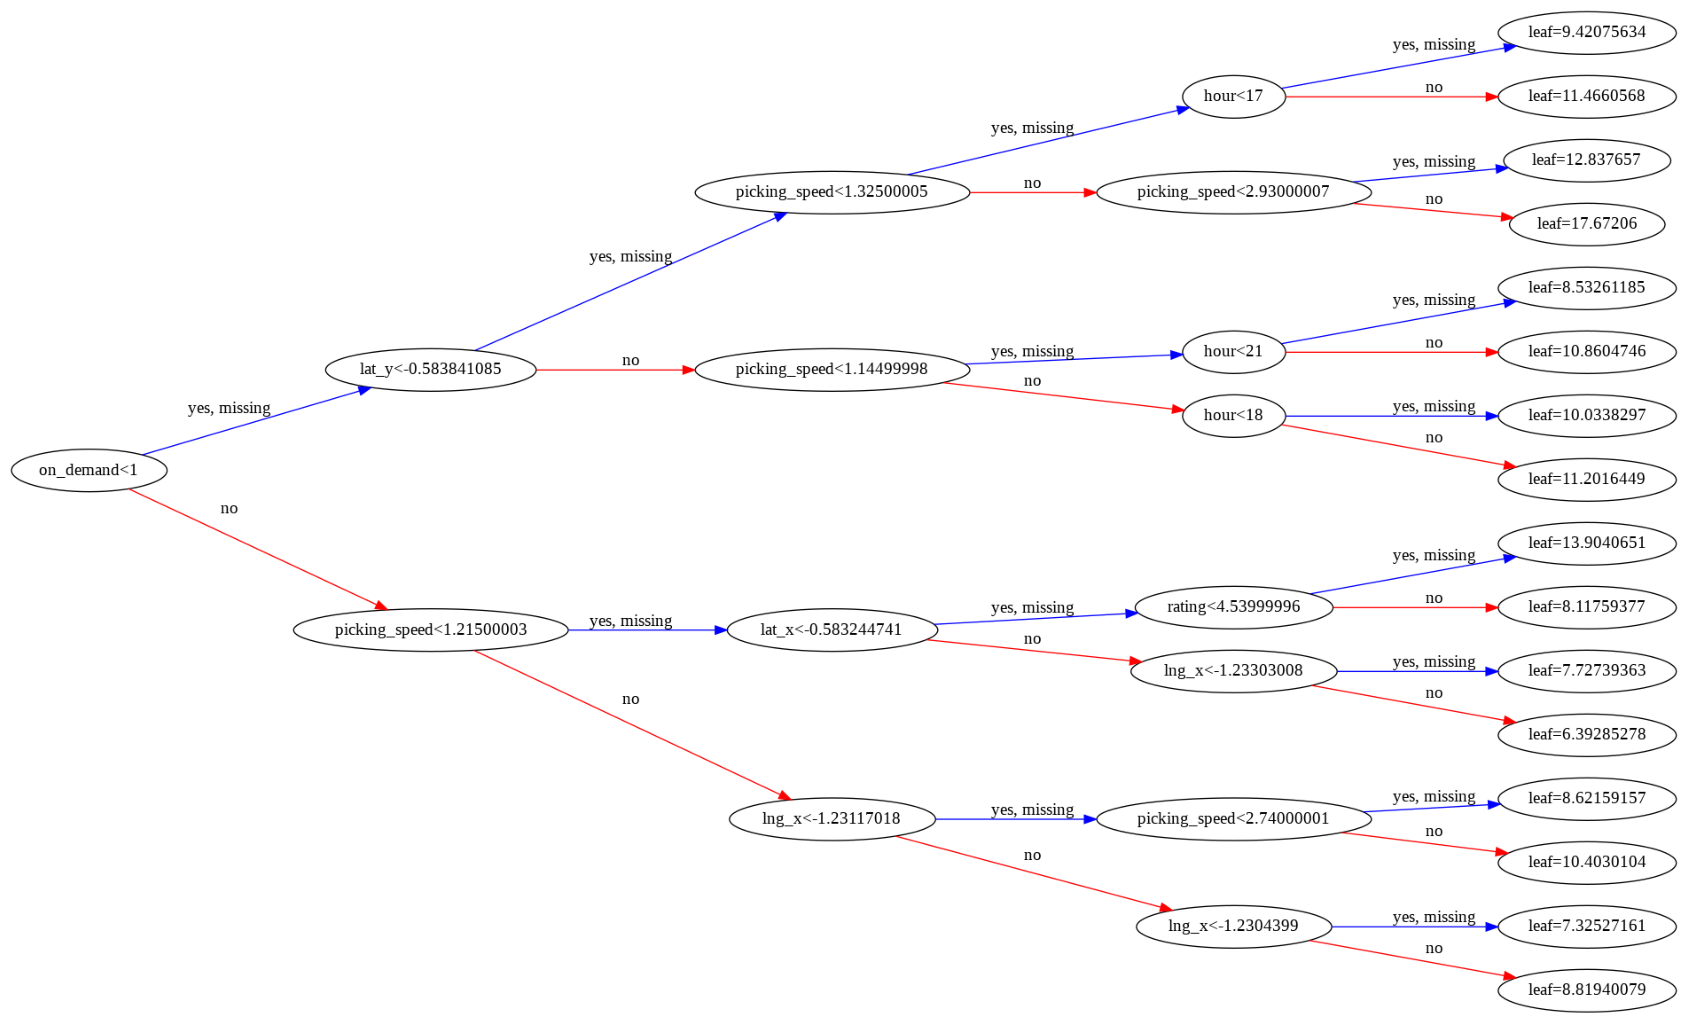

In [226]:
plot_tree(model, rankdir='LR');

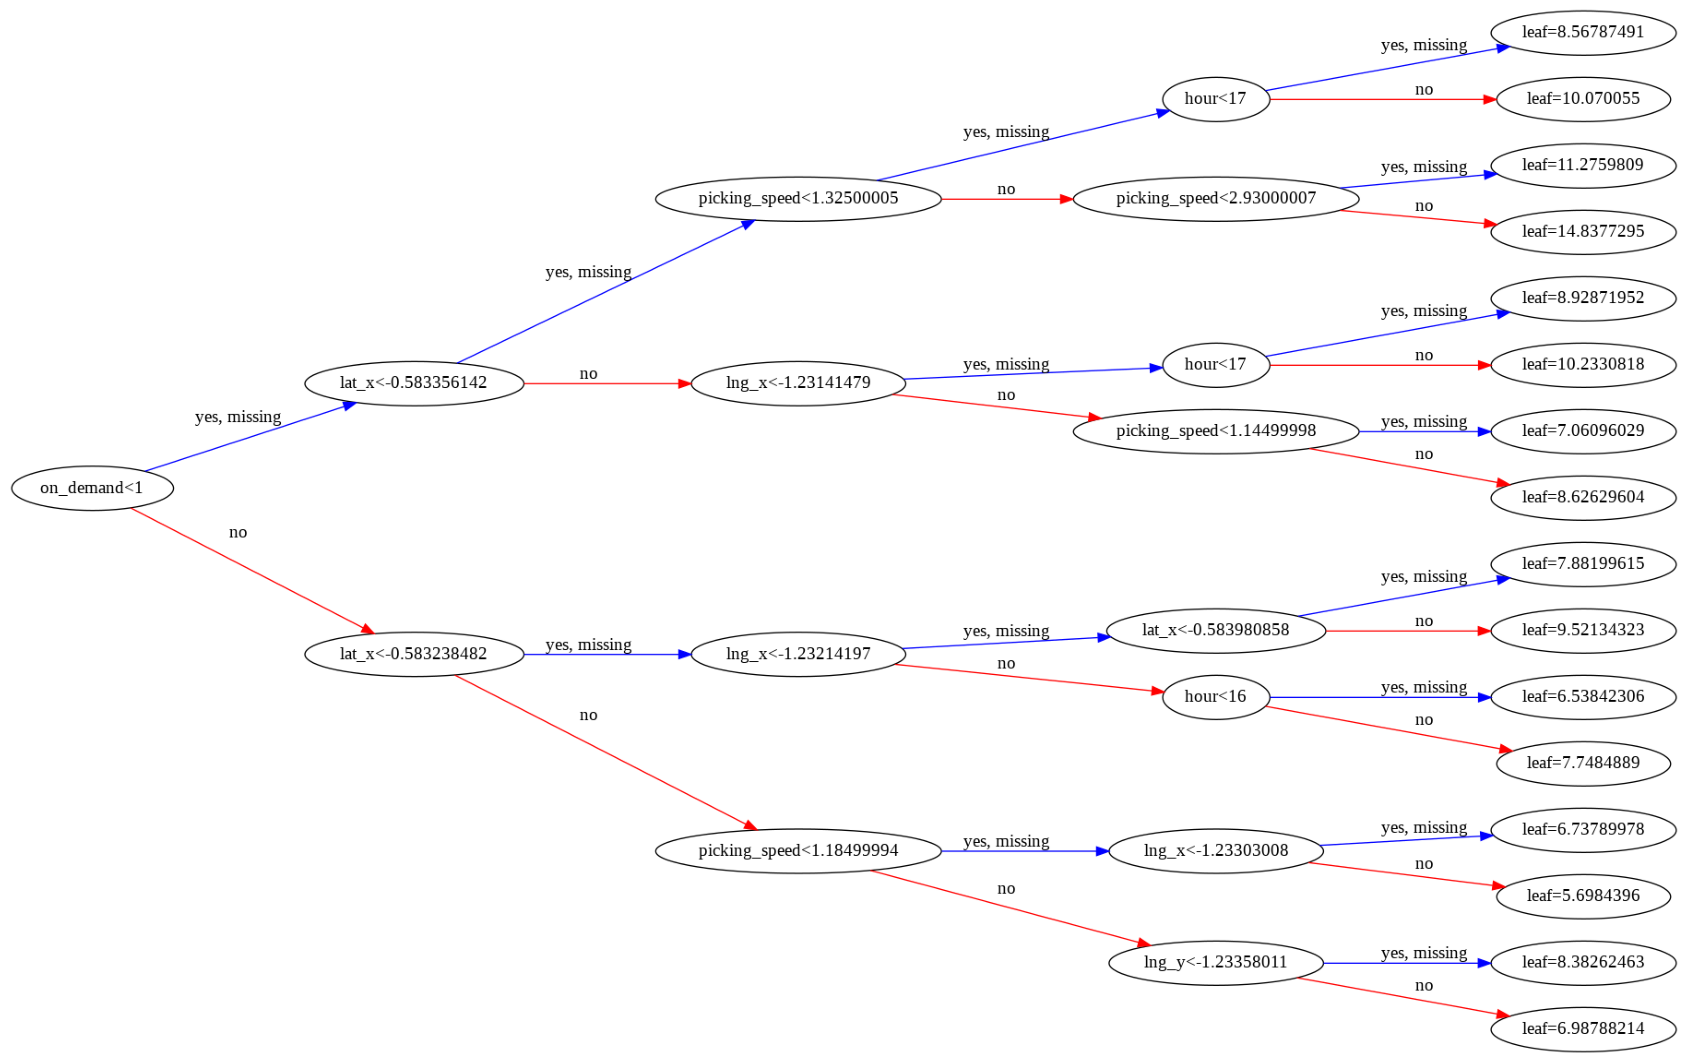

In [227]:
plot_tree(model, rankdir='LR', num_trees=1);

Observe cómo los árboles solo calculan los residuos y no el valor objetivo real. También podemos visualizar el árbol como texto. 

In [228]:
trees = model.get_booster().get_dump()

In [229]:
len(trees)

20

In [230]:
print(trees[0])

0:[on_demand<1] yes=1,no=2,missing=1
	1:[lat_y<-0.583841085] yes=3,no=4,missing=3
		3:[picking_speed<1.32500005] yes=7,no=8,missing=7
			7:[hour<17] yes=15,no=16,missing=15
				15:leaf=9.42075634
				16:leaf=11.4660568
			8:[picking_speed<2.93000007] yes=17,no=18,missing=17
				17:leaf=12.837657
				18:leaf=17.67206
		4:[picking_speed<1.14499998] yes=9,no=10,missing=9
			9:[hour<21] yes=19,no=20,missing=19
				19:leaf=8.53261185
				20:leaf=10.8604746
			10:[hour<18] yes=21,no=22,missing=21
				21:leaf=10.0338297
				22:leaf=11.2016449
	2:[picking_speed<1.21500003] yes=5,no=6,missing=5
		5:[lat_x<-0.583244741] yes=11,no=12,missing=11
			11:[rating<4.53999996] yes=23,no=24,missing=23
				23:leaf=13.9040651
				24:leaf=8.11759377
			12:[lng_x<-1.23303008] yes=25,no=26,missing=25
				25:leaf=7.72739363
				26:leaf=6.39285278
		6:[lng_x<-1.23117018] yes=13,no=14,missing=13
			13:[picking_speed<2.74000001] yes=27,no=28,missing=27
				27:leaf=8.62159157
				28:leaf=10.4030104
			14:[lng_x<-1

## Feature importance
 XGBoost posee feature importance score para cada columana en el input


In [231]:
importance_df = pd.DataFrame({
    'feature': train_inputs_oh.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [232]:
importance_df.head(10)

,feature,importance
4,on_demand,0.484276
163,c4ca4238a0b923820dcc509a6f75849b,0.088569
14,lat_y,0.074474
2,lat_x,0.051026
11,picking_speed,0.047839
3,lng_x,0.041334
7,hour,0.037867
15,lng_y,0.034758
8,minute,0.026866
144,a87ff679a2f3e71d9181a67b7542122c,0.025801


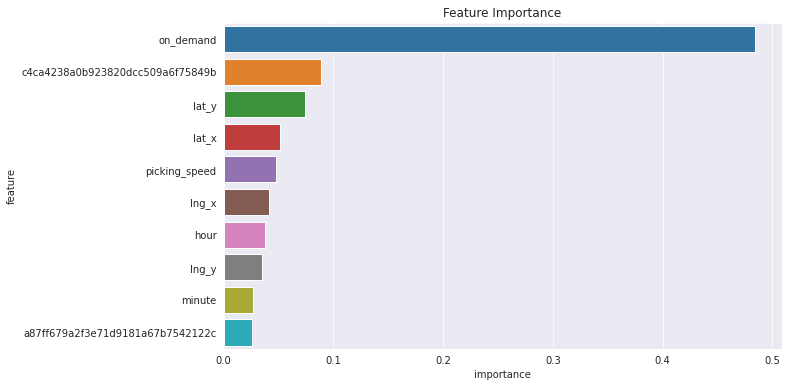

In [233]:
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

In [234]:
def test_params(**params):
    model = XGBRegressor(n_jobs=-1, random_state=42, **params)
    model.fit(train_inputs_oh, train_targets_oh)
    train_rmse = rmse(model.predict(train_inputs_oh), train_targets_oh)
    val_rmse = rmse(model.predict(val_inputs_oh), val_targets_oh)
    test_rmse = rmse(model.predict(test_inputs_oh), test_targets_oh)

    print('Train RMSE: {}, Validation RMSE: {}, Test RMSE: {}'.format(train_rmse, val_rmse, test_rmse))

# n_estimators
probando diferentes parametros 

In [235]:
test_params(n_estimators=10)

[21:04:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 47.91601946985229, Validation RMSE: 47.78899709987984, Test RMSE: 47.893006051172506


In [236]:
test_params(n_estimators=30)

[21:04:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 31.74976267694175, Validation RMSE: 31.805170756482138, Test RMSE: 31.802918492973415


In [237]:
test_params(n_estimators=100)

[21:05:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 29.145506995403288, Validation RMSE: 29.33923446629982, Test RMSE: 29.28965584053654


In [238]:
test_params(n_estimators=240)

[21:05:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 27.05089623431466, Validation RMSE: 27.311085219854597, Test RMSE: 27.295972403634394


In [239]:
test_params(n_estimators=300)

[21:06:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 26.275933373350433, Validation RMSE: 26.571999366878277, Test RMSE: 26.533426690839843


# max_depth

si aumenta la profundidad del arbol podria captar mas informacion


In [240]:
test_params(max_depth=2)

[21:07:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 30.91743060536273, Validation RMSE: 31.029962336679187, Test RMSE: 30.960810710615824


In [241]:
test_params(max_depth=5)

[21:08:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 24.43525613361979, Validation RMSE: 24.682766338977114, Test RMSE: 24.692167134016035


In [242]:
test_params(max_depth=10)

[21:08:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 8.332924665608006, Validation RMSE: 8.948948165854471, Test RMSE: 8.973626473248661


In [243]:
test_params(max_depth=20)

[21:10:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 0.08010564917781701, Validation RMSE: 2.462661674918871, Test RMSE: 2.457457287540244


# learning_rate

In [244]:
test_params(n_estimators=50, learning_rate=0.01)

[21:13:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 68.8258766368885, Validation RMSE: 68.6530629750883, Test RMSE: 68.77634130876093


In [245]:
test_params(n_estimators=300, learning_rate=0.1)

[21:13:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 26.275933373350433, Validation RMSE: 26.571999366878277, Test RMSE: 26.533426690839843


In [246]:
test_params(n_estimators=300, learning_rate=0.3)

[21:14:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 21.380903196290582, Validation RMSE: 21.744935790017834, Test RMSE: 21.74236643963294


In [247]:
test_params(n_estimators=300, learning_rate=0.9)

[21:16:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 15.826258591159533, Validation RMSE: 16.584504921364026, Test RMSE: 16.631732507912407


In [248]:
test_params(n_estimators=300, learning_rate=0.9, max_depth=20 )

[21:17:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 0.0004427477818123568, Validation RMSE: 2.9903134721979594, Test RMSE: 3.308050979485806


# booster
intente ocupar modelo lineal pero da peores resultados

In [249]:
test_params(booster='gblinear')

[21:19:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 35.15885947544779, Validation RMSE: 35.120951600823425, Test RMSE: 35.172085546818224


# Juntando todo y creando predicciones 
con los parametros que han dado mejores resultados

In [250]:
model = XGBRegressor(n_jobs=-1, random_state=42, n_estimators=300, 
                     learning_rate=0.9, max_depth=20,
                     colsample_bytree=0.7)

In [251]:
%%time
model.fit(train_inputs_oh, train_targets_oh)

[21:19:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 3min 10s, sys: 248 ms, total: 3min 10s
Wall time: 1min 36s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.9, max_delta_step=0,
             max_depth=20, min_child_weight=1, missing=None, n_estimators=300,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

Predicciones que ocuparemos

In [252]:
test_preds = model.predict(test_inputs_oh)

In [253]:
test_preds

array([135.20227 , 175.81303 ,  90.8586  , ..., 115.42831 , 176.6771  ,
        75.369995], dtype=float32)

In [254]:
val_preds=model.predict(val_inputs_oh)

In [255]:
val_preds

array([124.653114, 112.71272 ,  43.36694 , ...,  84.033424,  69.12042 ,
        73.03818 ], dtype=float32)

In [256]:
train_predicts = model.predict(train_inputs_oh)

In [257]:
train_predicts

array([114.268616,  56.35429 ,  81.03334 , ..., 140.21457 , 119.07887 ,
       158.76697 ], dtype=float32)

## crear data frame con train y predicciones y reales 

In [258]:
score= model.score(train_inputs_oh,train_targets_oh)
print("Training score: ", score)

Training score:  0.9999999997698221


In [259]:
score= model.score(val_inputs_oh, val_targets_oh)
print("Training score: ", score)

Training score:  0.9928147434053975


In [260]:
score= model.score(test_inputs_oh, test_targets_oh)
print("Training score: ", score)

Training score:  0.9930224940878352


Random forest Regressor el otro algoritmo de machine learning que ocuparemos ambos son de los mejores y no necesitan normalizacion su debilidad puede ser que no son muy rapidos como por ejemplo Support vector Regression o linear regression

In [261]:
from sklearn.ensemble import RandomForestRegressor

In [262]:
model = RandomForestRegressor(n_jobs=-1, random_state=42)

In [263]:
%%time
model.fit(train_inputs_oh, train_targets_oh)

CPU times: user 1min 30s, sys: 130 ms, total: 1min 30s
Wall time: 45.9 s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [264]:
model.score(train_inputs_oh, train_targets_oh)

0.9992140481909276

In [265]:
model.score(val_inputs_oh, val_targets_oh)

0.994848682627454

In [266]:
model.score(test_inputs_oh,test_targets_oh)

0.995177009113861

In [267]:
model.estimators_[0]

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1608637542, splitter='best')

Feature importance

In [268]:
importance_df = pd.DataFrame({
    'feature': train_inputs_oh.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [269]:
importance_df.head(10)

,feature,importance
3,lng_x,0.142856
2,lat_x,0.140236
11,picking_speed,0.138603
10,found_rate,0.123003
8,minute,0.103206
7,hour,0.087641
13,rating,0.062853
14,lat_y,0.055802
4,on_demand,0.041817
12,accepted_rate,0.040672


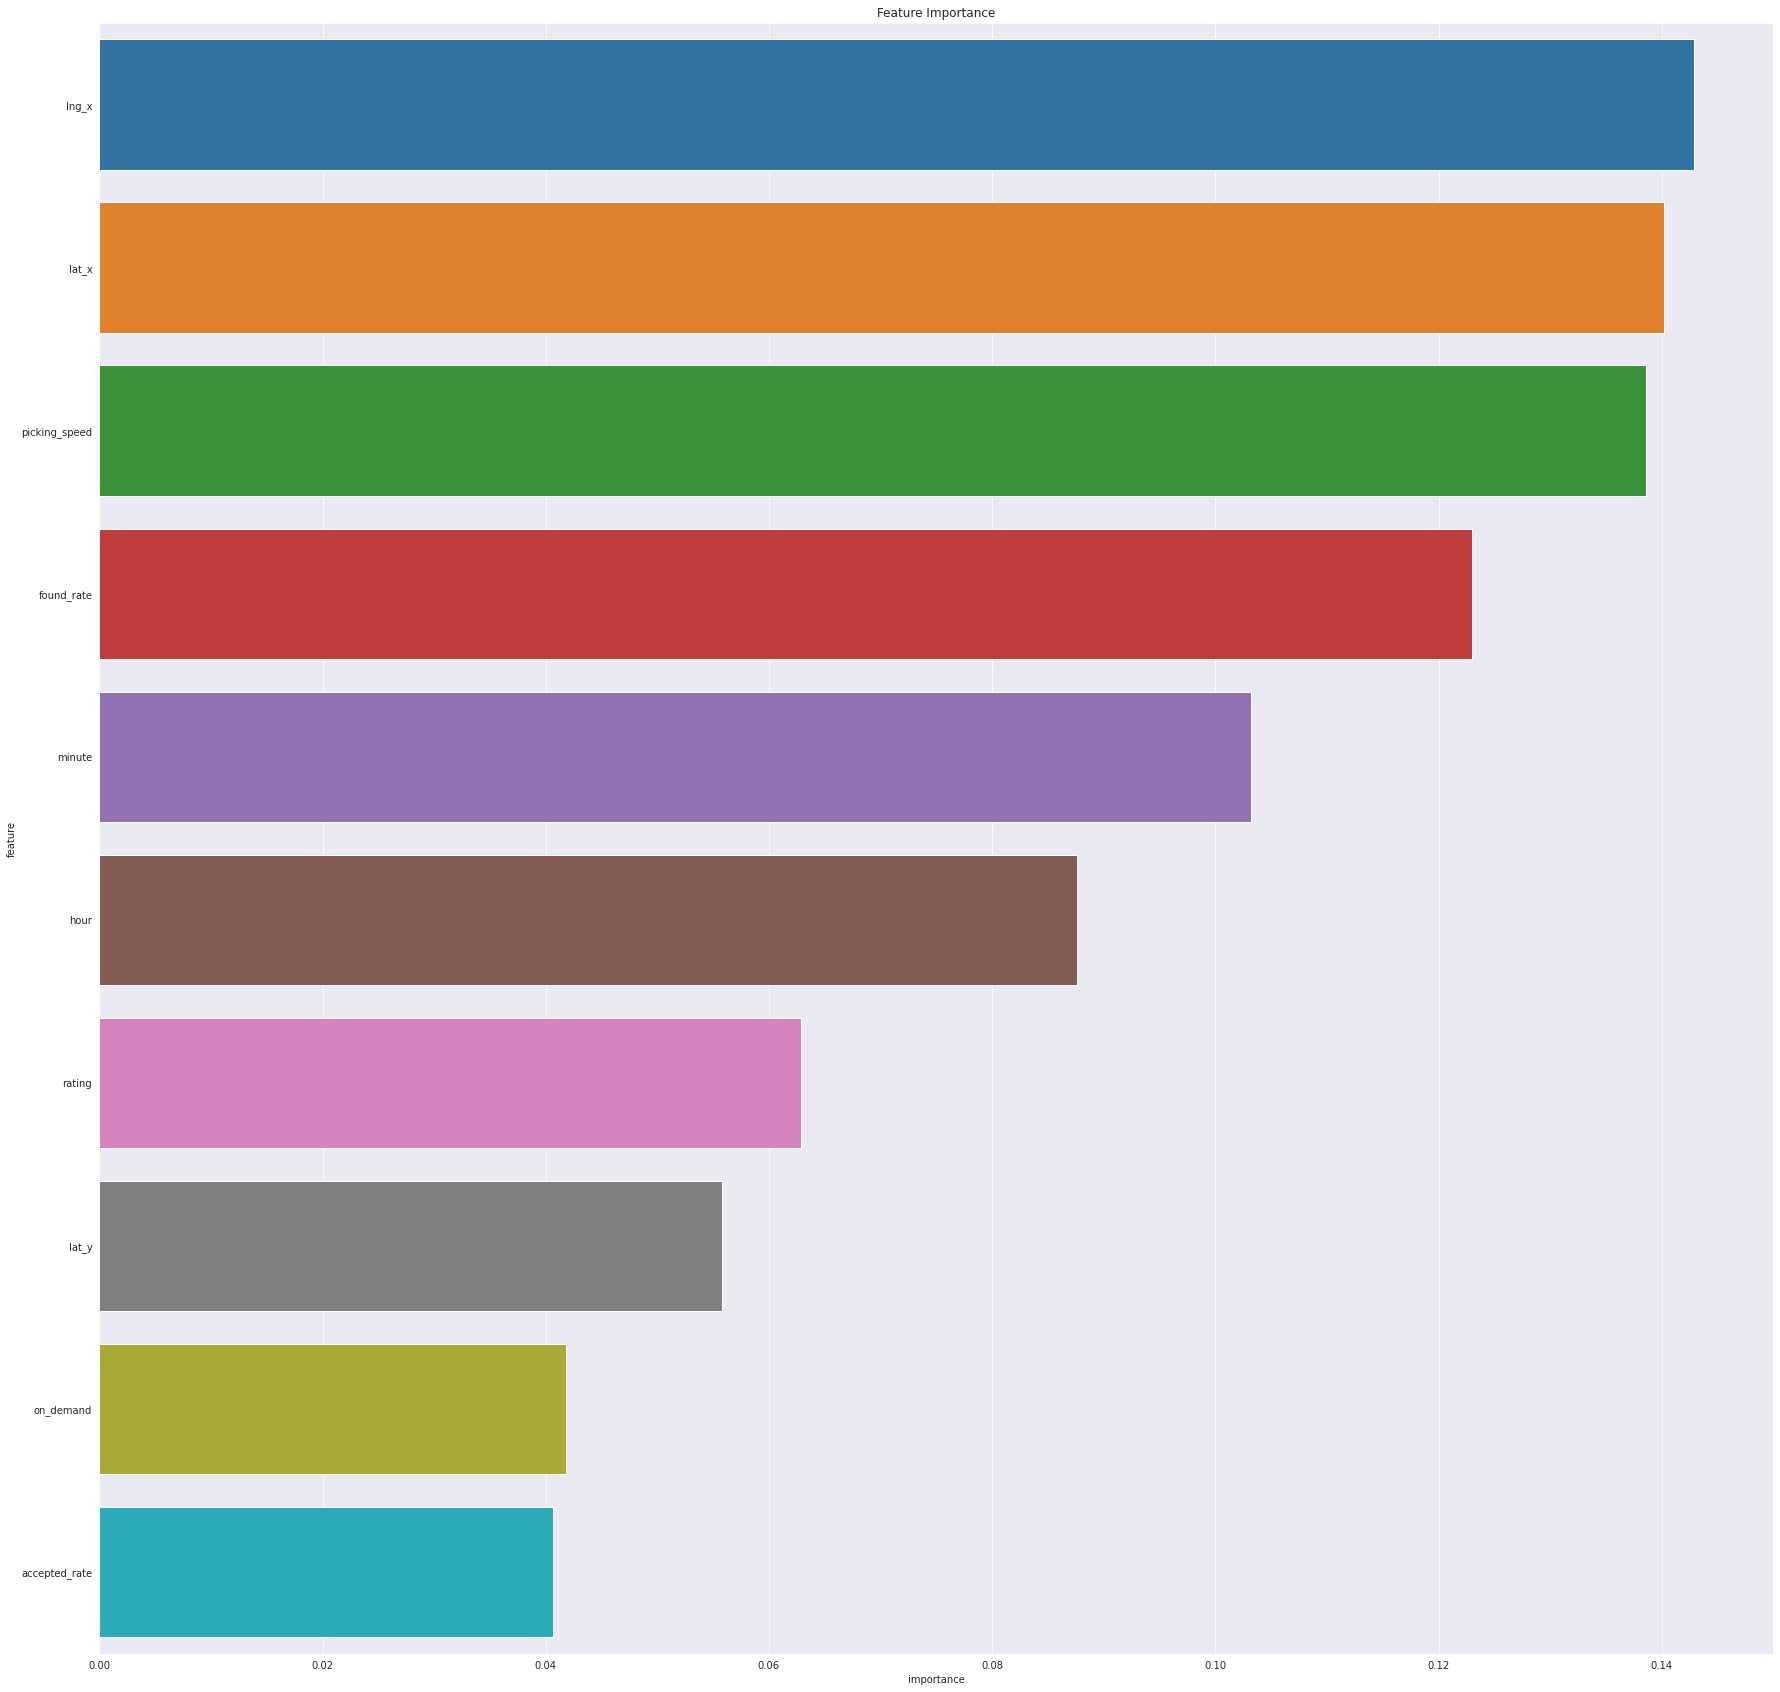

In [270]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

In [271]:
base_model = RandomForestRegressor(random_state=42, n_jobs=-1).fit(train_inputs_oh, train_targets_oh)

In [272]:
base_train_acc = base_model.score(train_inputs_oh, train_targets_oh)
base_val_acc = base_model.score(val_inputs_oh, val_targets_oh)
base_test_acc = base_model.score(test_inputs_oh, test_targets_oh)

In [273]:
base_accs = base_train_acc, base_val_acc, base_test_acc
base_accs

(0.9992140481909276, 0.994848682627454, 0.995177009113861)

# n_estimators
lo mismo probamos parametros y luego al final probamos el mejor para hacer predicciones

In [274]:
model = RandomForestRegressor(random_state=42, n_jobs=-1, n_estimators=10)

In [275]:
model.fit(train_inputs_oh, train_targets_oh)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [276]:
model.score(train_inputs_oh, train_targets_oh), model.score(val_inputs_oh, val_targets_oh), model.score(test_inputs_oh, test_targets_oh)


(0.9987282308665223, 0.9937972787589598, 0.9941734679834783)

In [277]:
model = RandomForestRegressor(random_state=42, n_jobs=-1, n_estimators=500)
model.fit(train_inputs_oh, train_targets_oh)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [278]:
model.score(train_inputs_oh, train_targets_oh)

0.9992708579299012

In [279]:
def test_params(**params):
    model = RandomForestRegressor(random_state=42, n_jobs=-1, **params).fit(train_inputs_oh, train_targets_oh)
    return model.score(train_inputs_oh, train_targets_oh), model.score(val_inputs_oh, val_targets_oh), model.score(test_inputs_oh, test_targets_oh)

In [280]:
test_params(max_depth=5)

(0.29607937397459116, 0.2923764081617246, 0.28659001561371245)

In [281]:
test_params(max_depth=26)

(0.9991787990525045, 0.9948203841296053, 0.995159063260447)

# max_features

In [282]:
test_params(max_features='log2')

(0.9973576245216085, 0.9814728823450909, 0.9822890304241286)

In [283]:
test_params(max_features=3)

(0.99706084707932, 0.9794508292240028, 0.9800366548643787)

In [284]:
base_accs

(0.9992140481909276, 0.994848682627454, 0.995177009113861)

# min_samples_split and min_samples_leaf

In [285]:
test_params(min_samples_split=3, min_samples_leaf=2)

(0.9976748282558042, 0.9924509955251711, 0.9927602090122616)

In [286]:
test_params(min_samples_split=100, min_samples_leaf=60)

(0.7893203511105753, 0.7760957701251608, 0.7756760780538252)

##min_impurity_decrease


In [287]:
test_params(min_impurity_decrease=1e-7)

(0.9992143133437631, 0.9948524412195405, 0.9951786983590366)

In [288]:
test_params(min_impurity_decrease=1e-2)

(0.9977408894229386, 0.9930293751367956, 0.9933832964670296)

# bootstrap, max_samples

In [289]:
test_params(bootstrap=False)

(1.0, 0.9937046863809005, 0.9934449117176236)

In [290]:
test_params(max_samples=0.9)

(0.9990011164667326, 0.9946137818110538, 0.9949014565323974)

In [291]:
model = RandomForestRegressor(n_jobs=-1, 
                               random_state=42, 
                               n_estimators=500,
                               max_features=40,
                               max_depth=30)

In [292]:
model.fit(train_inputs_oh, train_targets_oh)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features=40, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [293]:
model.score(train_inputs_oh, train_targets_oh), model.score(val_inputs_oh, val_targets_oh), model.score(test_inputs_oh, test_targets_oh)

(0.9991477849897976, 0.9941696463439582, 0.9948621255899132)

In [294]:
model.score(test_inputs_oh, test_targets_oh)

0.9948621255899132

predicciones de ambos modelos para los minutos que pasaremos a un archivo csv

In [295]:
test_preds_1 =  model.predict(test_inputs_oh)

In [296]:
test_preds_1

array([133.41799859, 175.43839258,  90.85856178, ..., 115.35041364,
       176.67581073,  75.30453535])

In [297]:
val_preds_1=model.predict(val_inputs_oh)

In [298]:
val_preds_1

array([123.89734701, 112.73299516,  43.88552146, ...,  85.70926996,
        69.12061553,  74.37722076])

In [299]:
train_preds_1= model.predict(train_inputs_oh)

In [300]:
train_preds_1

array([114.12015633,  56.44027913,  81.03311387, ..., 140.19734165,
       119.06372604, 158.76692538])

#guardar archivos necesarios para mandar
y crear los archivos 

In [301]:
order_id_raw

0         689d8866915acf87e851c2591a23a82f
1         689d8866915acf87e851c2591a23a82f
2         689d8866915acf87e851c2591a23a82f
3         689d8866915acf87e851c2591a23a82f
4         689d8866915acf87e851c2591a23a82f
                        ...               
153016    61619dedbf5936abf1054e3ee1522541
153017    15d863eee237ba57f89263a9941ea040
153018    b9a4f78236dfdbc75e430dec375d8220
153019    b9a4f78236dfdbc75e430dec375d8220
153020    9c0141c3a7d48c07ab8a14d8f8eb6136
Name: order_id, Length: 153021, dtype: object

In [302]:
total_minutes=ohe_dummies_1['total_minutes']

In [303]:
total_minutes

0          91.855363
1          91.855363
2          91.855363
3          91.855363
4          91.855363
             ...    
153016     34.463592
153017     64.300455
153018    107.024610
153019    107.024610
153020     60.163148
Name: total_minutes, Length: 153021, dtype: float64

In [304]:
train_val, test_df = train_test_split(order_id_raw, test_size=0.2, random_state=42)
train, val = train_test_split(train_val, test_size=0.25, random_state=42)

In [316]:
train_XGB = pd.DataFrame({
    'order_id': train,
    'total_minutes': train_targets_oh,
    'predict_minutes': train_predicts
})

In [317]:
train_XGB

,order_id,total_minutes,predict_minutes
141868,7497680294c169df8200ba19fababd2b,114.268386,114.268616
18933,9a280f8d63c79eed802296396aec7160,56.354627,56.354290
31449,b1e1c263b0e6ed4e790c23723f9f81ae,81.033114,81.033340
21523,1d12baf9bd87d701d42c032e640bd69d,72.606586,72.606529
33956,0ecc4239d54010fb5b884606d26a0063,60.212430,60.212387
...,...,...,...
8787,05691325b97fc0b8ae5ca49ad1f109f4,177.176022,177.175873
16565,077cf22a8c06f42087e8ee08ddb15b9f,110.908844,110.908638
88218,92b33fdf6eafe3781ba8fde6c66d72ef,140.214792,140.214569
28257,f9430543ec363dfd1872f3ed7192e8f7,119.079047,119.078873


In [319]:
val_XGB = pd.DataFrame({
    'order_id': val,
    'total_minutes': val_targets_oh,
    'predict_minutes': val_preds
})

In [320]:
val_XGB

,order_id,total_minutes,predict_minutes
74627,8ec4a16b38062049686affbac22da1f7,124.653208,124.653114
97293,061e8a7393babda47df3c52e2b30d6dd,112.713049,112.712723
147567,b58a0a789fc737376cb0746cffcdc75b,43.367303,43.366940
3347,f01c3f2b2873e611955e740ba4db3822,165.259573,165.259552
34325,a77e9b1ac7d19b52b1bbfb4bc08ef158,160.813647,160.813843
...,...,...,...
103850,87e4e3be1abb8d2d03e929211d7d8588,71.500930,71.500710
18930,9a280f8d63c79eed802296396aec7160,56.354627,56.354290
21408,79d72aebe66387ea4a2c3d4ad9445662,84.011522,84.033424
10773,84413aed45d2f969c0cc21b64dd8aef4,69.120616,69.120422


In [323]:
test_XGB = pd.DataFrame({
    'order_id': test_df,
    'total_minutes': test_targets_oh,
    'predict_minutes': test_preds
})

In [324]:
test_XGB

,order_id,total_minutes,predict_minutes
65380,f84cdb6f46254add6605c30c0660f8d3,135.202108,135.202271
118355,a7773246543bacba3215f25736d43836,175.814163,175.813034
109284,5b629a13f23df3799b0f1607fd67d6a5,90.858562,90.858597
134784,e5e128325db794cce91ffd09c809bf9d,122.833417,122.833603
129172,ddd880ecd55e283d30b8bc761d841d65,106.175344,106.175377
...,...,...,...
135377,4cb37b4bf5eb3f90033cc3f7c4b5633d,186.507891,186.508667
74778,5df15c569fd5da6cf250faf62681ad26,99.619284,99.619461
111218,863286226b1bedae0633c0260560e48f,115.428432,115.428307
61231,b8b702d6ea34b0207006b8edb900975a,176.675811,176.677094


In [325]:
XGB_pred = pd.concat([train_XGB,val_XGB,test_XGB],axis=0)

In [326]:
XGB_pred

,order_id,total_minutes,predict_minutes
141868,7497680294c169df8200ba19fababd2b,114.268386,114.268616
18933,9a280f8d63c79eed802296396aec7160,56.354627,56.354290
31449,b1e1c263b0e6ed4e790c23723f9f81ae,81.033114,81.033340
21523,1d12baf9bd87d701d42c032e640bd69d,72.606586,72.606529
33956,0ecc4239d54010fb5b884606d26a0063,60.212430,60.212387
...,...,...,...
135377,4cb37b4bf5eb3f90033cc3f7c4b5633d,186.507891,186.508667
74778,5df15c569fd5da6cf250faf62681ad26,99.619284,99.619461
111218,863286226b1bedae0633c0260560e48f,115.428432,115.428307
61231,b8b702d6ea34b0207006b8edb900975a,176.675811,176.677094


In [333]:
train_RF = pd.DataFrame({
    'order_id': train,
    'total_minutes': train_targets_oh,
    'predict_minutes': train_preds_1
})

In [334]:
train_RF

,order_id,total_minutes,predict_minutes
141868,7497680294c169df8200ba19fababd2b,114.268386,114.120156
18933,9a280f8d63c79eed802296396aec7160,56.354627,56.440279
31449,b1e1c263b0e6ed4e790c23723f9f81ae,81.033114,81.033114
21523,1d12baf9bd87d701d42c032e640bd69d,72.606586,72.606586
33956,0ecc4239d54010fb5b884606d26a0063,60.212430,60.230022
...,...,...,...
8787,05691325b97fc0b8ae5ca49ad1f109f4,177.176022,177.176022
16565,077cf22a8c06f42087e8ee08ddb15b9f,110.908844,110.606402
88218,92b33fdf6eafe3781ba8fde6c66d72ef,140.214792,140.197342
28257,f9430543ec363dfd1872f3ed7192e8f7,119.079047,119.063726


In [330]:
val_RF = pd.DataFrame({
    'order_id': val,
    'total_minutes': val_targets_oh,
    'predict_minutes': val_preds_1
})

In [331]:
val_RF

,order_id,total_minutes,predict_minutes
74627,8ec4a16b38062049686affbac22da1f7,124.653208,123.897347
97293,061e8a7393babda47df3c52e2b30d6dd,112.713049,112.732995
147567,b58a0a789fc737376cb0746cffcdc75b,43.367303,43.885521
3347,f01c3f2b2873e611955e740ba4db3822,165.259573,165.259573
34325,a77e9b1ac7d19b52b1bbfb4bc08ef158,160.813647,160.813646
...,...,...,...
103850,87e4e3be1abb8d2d03e929211d7d8588,71.500930,69.883839
18930,9a280f8d63c79eed802296396aec7160,56.354627,56.440279
21408,79d72aebe66387ea4a2c3d4ad9445662,84.011522,85.709270
10773,84413aed45d2f969c0cc21b64dd8aef4,69.120616,69.120616


In [335]:
test_RF = pd.DataFrame({
    'order_id': test_df,
    'total_minutes': test_targets_oh,
    'predict_minutes': test_preds_1
})

In [336]:
test_RF

,order_id,total_minutes,predict_minutes
65380,f84cdb6f46254add6605c30c0660f8d3,135.202108,133.417999
118355,a7773246543bacba3215f25736d43836,175.814163,175.438393
109284,5b629a13f23df3799b0f1607fd67d6a5,90.858562,90.858562
134784,e5e128325db794cce91ffd09c809bf9d,122.833417,122.833417
129172,ddd880ecd55e283d30b8bc761d841d65,106.175344,106.187183
...,...,...,...
135377,4cb37b4bf5eb3f90033cc3f7c4b5633d,186.507891,185.652881
74778,5df15c569fd5da6cf250faf62681ad26,99.619284,99.451614
111218,863286226b1bedae0633c0260560e48f,115.428432,115.350414
61231,b8b702d6ea34b0207006b8edb900975a,176.675811,176.675811


In [337]:
RF_pred = pd.concat([train_RF,val_RF,test_RF],axis=0)

In [338]:
RF_pred

,order_id,total_minutes,predict_minutes
141868,7497680294c169df8200ba19fababd2b,114.268386,114.120156
18933,9a280f8d63c79eed802296396aec7160,56.354627,56.440279
31449,b1e1c263b0e6ed4e790c23723f9f81ae,81.033114,81.033114
21523,1d12baf9bd87d701d42c032e640bd69d,72.606586,72.606586
33956,0ecc4239d54010fb5b884606d26a0063,60.212430,60.230022
...,...,...,...
135377,4cb37b4bf5eb3f90033cc3f7c4b5633d,186.507891,185.652881
74778,5df15c569fd5da6cf250faf62681ad26,99.619284,99.451614
111218,863286226b1bedae0633c0260560e48f,115.428432,115.350414
61231,b8b702d6ea34b0207006b8edb900975a,176.675811,176.675811


# Creamos los dataframes
y luego los unimos y los guardamos en csv con las caracteristicas que pedian

In [341]:
XGB_pred.to_csv('XGB_pred.csv', index= None)

In [343]:
RF_pred.to_csv('RF_pred.csv', index= None)